In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# To check the Contents
!ls

drive  sample_data


In [0]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [0]:
# Import the Data frame
df = pd.read_csv('/content/drive/My Drive/Lead Score - Case Study/Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [0]:
# To check the Dimension of the Data frame
df.shape

(9240, 37)

In [0]:
# To check the statistic of the Dataframe
df.describe(percentiles=[0.10, 0.25, 0.5,0.75, 0.95])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
10%,586361.700000,0.000000,0.000000,0.000000,0.000000,13.000000,15.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [0]:
# To check the Data Types distribution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

AS it can be seen above there are around 7 **Numeric** Column and 30 **Categorical** Value

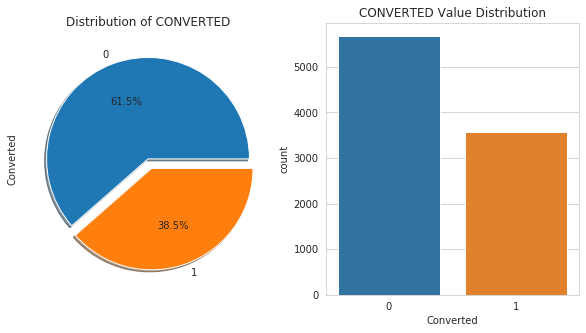

In [0]:
# To check the class imbalance of the Converted Variable Converted
# Plotting a Bar Plot and Pie Chart
f,ax=plt.subplots(1,2,figsize= (10,5))
df.Converted.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, ax = ax[0])
ax[0].set_title('Distribution of CONVERTED')
sns.countplot(df['Converted'],ax=ax[1])
ax[1].set_title('CONVERTED Value Distribution')
plt.show()

As it can be seen above there is a small class imbalance for the CONVERTED Variable. So we have around **61.5%** of data is **Not converted** but around **38.5%** are converted

### Checking the null values in the dataframe

In [0]:
# Checking the Null Values 
null = pd.DataFrame(round(100*(df.isnull().sum()/len(df)),2), columns = ['Null Values'])
null.sort_values(by='Null Values', ascending= False).head(20)

,Null Values
Lead Quality,51.59
Asymmetrique Activity Index,45.65
Asymmetrique Profile Score,45.65
Asymmetrique Activity Score,45.65
Asymmetrique Profile Index,45.65
Tags,36.29
Lead Profile,29.32
What matters most to you in choosing a course,29.32
What is your current occupation,29.11
Country,26.63


Checking the distribution of variable 'Lead Quality'

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

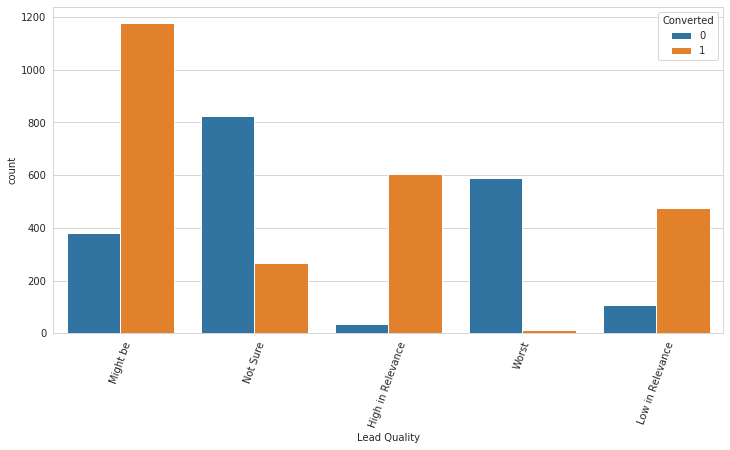

In [0]:
plt.figure(figsize=(12,6))
sns.countplot(df['Lead Quality'],hue=df['Converted'], order=df['Lead Quality'].value_counts().index)
plt.xticks(rotation=70)

In [0]:
# Lead Quality Data Distribution
df['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

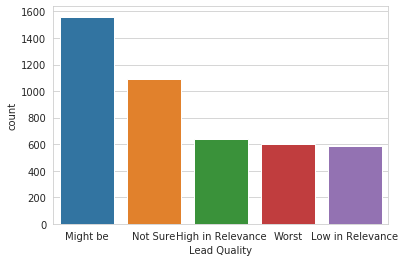

In [0]:
# Frequency Plot
sns.countplot(df['Lead Quality'], order = df['Lead Quality'].value_counts().index)

In [0]:
# Checking the Distribution 
df['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

As the variable has 51% null values and we can't replace those null values with any of the appropriate category, we'll drop the column

In [0]:
# Dropping the Columns
df.drop(columns='Lead Quality', inplace = True)

In [0]:
# Checking the Null Values 
null = pd.DataFrame(round(100*(df.isnull().sum()/len(df)),2), columns = ['Null Values'])
null.sort_values(by='Null Values', ascending= False).head(20)

,Null Values
Asymmetrique Profile Index,45.65
Asymmetrique Activity Index,45.65
Asymmetrique Profile Score,45.65
Asymmetrique Activity Score,45.65
Tags,36.29
Lead Profile,29.32
What matters most to you in choosing a course,29.32
What is your current occupation,29.11
Country,26.63
How did you hear about X Education,23.89


Dropping the 'Assymetrique' variables as they have 45% null values and makes no inference

In [0]:
# Dropping the Value
df.drop(columns=['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Activity Score'],inplace = True)

In [0]:
# Checking the Null Values 
null = pd.DataFrame(round(100*(df.isnull().sum()/len(df)),2), columns = ['Null Values'])
null.sort_values(by='Null Values', ascending= False).head(15)

,Null Values
Tags,36.29
Lead Profile,29.32
What matters most to you in choosing a course,29.32
What is your current occupation,29.11
Country,26.63
How did you hear about X Education,23.89
Specialization,15.56
City,15.37
TotalVisits,1.48
Page Views Per Visit,1.48


In [0]:
# To check the Value counts of Tags
df.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

The variable 'Tags' has a lot of categories and more than 30% of null values, So, we'll drop the variable 

In [0]:
# Dropping the Columns
df.drop(columns='Tags', inplace=True)

In [0]:
# Checking the Null Values 
null = pd.DataFrame(round(100*(df.isnull().sum()/len(df)),2), columns = ['Null Values'])
null.sort_values(by='Null Values', ascending= False).head(15)

,Null Values
What matters most to you in choosing a course,29.32
Lead Profile,29.32
What is your current occupation,29.11
Country,26.63
How did you hear about X Education,23.89
Specialization,15.56
City,15.37
Page Views Per Visit,1.48
TotalVisits,1.48
Last Activity,1.11


In [0]:
# Data Distribution
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

As we can see, the column is highly imbalanced towards a single category. Hence, we can simply drop this column

In [0]:
# Dropping the Columns
df.drop(columns= 'What matters most to you in choosing a course', inplace=True)

Checking the variable 'Lead Profile'

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

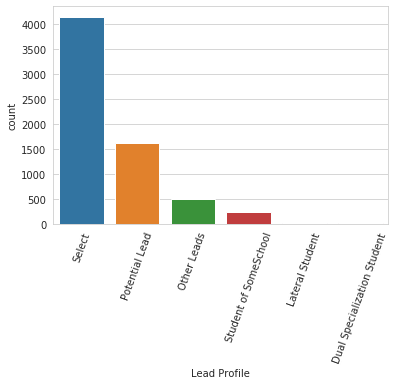

In [0]:
# Frequency Plot
sns.countplot(df['Lead Profile'], order = df['Lead Profile'].value_counts().index)
plt.xticks(rotation=70)

In [0]:
#Checking the percentage of 'Select' in the variable 'Lead Profile'
round(100*(len(df[df['Lead Profile'] == 'Select'])/len(df)),2)

44.87

As we see, there are ~45% of the data in the variable that has the value 'Select' that has to be treated as null value, as it is the value which is automatically given when not provided, hence we can drop the column 'Lead Profile'

In [0]:
# Dropping the Columns
df.drop(columns='Lead Profile', inplace=True)

In [0]:
# Checking the Null Values 
null = pd.DataFrame(round(100*(df.isnull().sum()/len(df)),2), columns = ['Null Values'])
null.sort_values(by='Null Values', ascending= False).head(10)

,Null Values
What is your current occupation,29.11
Country,26.63
How did you hear about X Education,23.89
Specialization,15.56
City,15.37
TotalVisits,1.48
Page Views Per Visit,1.48
Last Activity,1.11
Lead Source,0.39
Get updates on DM Content,0.00


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

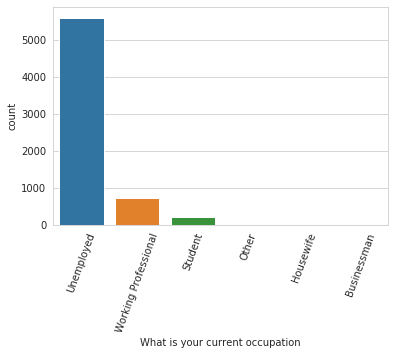

In [0]:
# Frequency Plot
sns.countplot(df['What is your current occupation'], order = df['What is your current occupation'].value_counts().index)
plt.xticks(rotation=70)

In [0]:
# Distribution of Values
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Replacing the null values with highest occuring category 'Unemployed'

In [0]:
df['What is your current occupation'].replace({np.nan:'Unemployed'}, inplace=True)

In [0]:
# Checking the Null Values 
null = pd.DataFrame(round(100*(df.isnull().sum()/len(df)),2), columns = ['Null Values'])
null.sort_values(by='Null Values', ascending= False).head(8)

,Null Values
Country,26.63
How did you hear about X Education,23.89
Specialization,15.56
City,15.37
Page Views Per Visit,1.48
TotalVisits,1.48
Last Activity,1.11
Lead Source,0.39


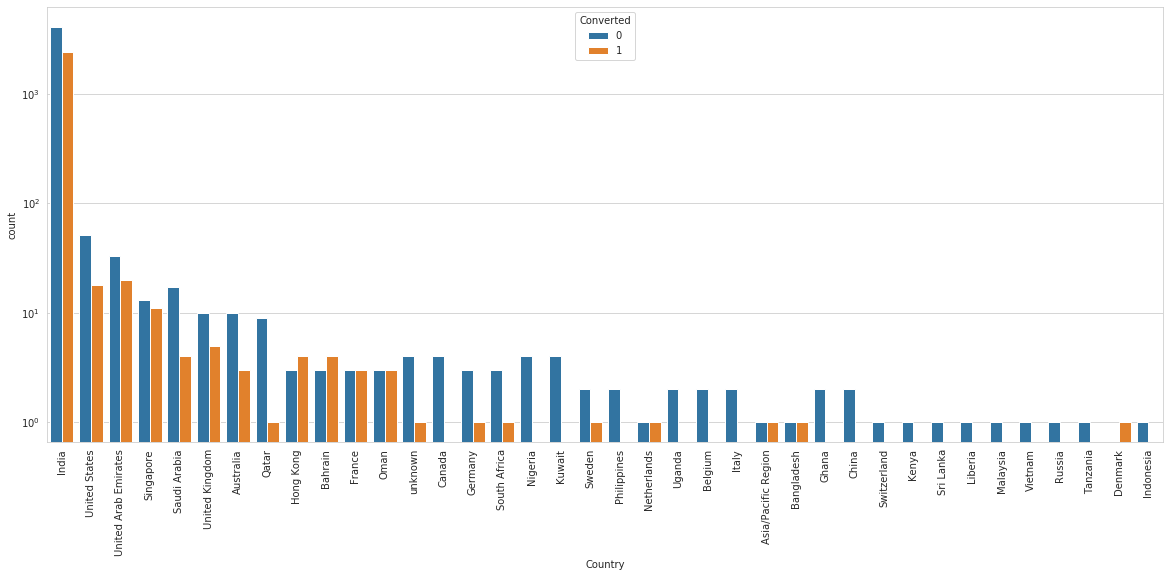

In [0]:
# Frequency plot of each features and categorized by Converted
plt.figure(figsize=(20,8))
sns.countplot(df.Country, hue=df.Converted, order=df.Country.value_counts().index)
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

Imputing missing values of the variable with 'India'

In [0]:
df.Country.replace({np.nan:'India'}, inplace=True)

In [0]:
# Checking the Null Values 
null = pd.DataFrame(round(100*(df.isnull().sum()/len(df)),2), columns = ['Null Values'])
null.sort_values(by='Null Values', ascending= False).head(8)

,Null Values
How did you hear about X Education,23.89
Specialization,15.56
City,15.37
TotalVisits,1.48
Page Views Per Visit,1.48
Last Activity,1.11
Lead Source,0.39
Prospect ID,0.00


In [0]:
df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [0]:
#Checking the percentage of 'Select' in the variable 'How did you hear about X Education'
round(100*(len(df[df['How did you hear about X Education'] == 'Select'])/len(df)),2)

54.58

As we see the same problem with the variable having 55% of the values as 'Select' persists, we can drop the column

In [0]:
df.drop(columns='How did you hear about X Education', inplace=True)

In [0]:
# Checking the Null Values 
null = pd.DataFrame(round(100*(df.isnull().sum()/len(df)),2), columns = ['Null Values'])
null.sort_values(by='Null Values', ascending= False).head(8)

,Null Values
Specialization,15.56
City,15.37
TotalVisits,1.48
Page Views Per Visit,1.48
Last Activity,1.11
Lead Source,0.39
Prospect ID,0.00
X Education Forums,0.00


In [0]:
# Value Counts of the Features
df.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [0]:
#Checking the percentage of 'Select' in the variable 'Specialization'
round(100*(len(df[df['Specialization'] == 'Select'])/len(df)),2)

21.02

In [0]:
# Dropping the Columns
df.drop(columns= 'Specialization', inplace=True)

In [0]:
# Checking the Null Values 
null = pd.DataFrame(round(100*(df.isnull().sum()/len(df)),2), columns = ['Null Values'])
null.sort_values(by='Null Values', ascending= False).head(8)

,Null Values
City,15.37
TotalVisits,1.48
Page Views Per Visit,1.48
Last Activity,1.11
Lead Source,0.39
Prospect ID,0.00
X Education Forums,0.00
A free copy of Mastering The Interview,0.00


In [0]:
# Value Counts
df.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [0]:
# To check the Number of Null Values
df.City.isnull().sum()

1420

In [0]:
# To group the columns
df.City.replace({'Select':'Unknown', np.nan: 'Unknown', 'Thane & Outskirts': 'Other','Other Cities':'Other', 'Other Cities of Maharashtra': 'Other',
                 'Other Metro Cities':'Other','Tier II Cities':'Other'}, inplace =True)

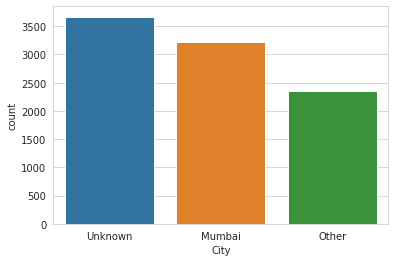

In [0]:
# Count for the features
sns.countplot(df.City)

In [0]:
# Checking the Null Values 
null = pd.DataFrame(round(100*(df.isnull().sum()/len(df)),2), columns = ['Null Values'])
null.sort_values(by='Null Values', ascending= False).head(5)

,Null Values
TotalVisits,1.48
Page Views Per Visit,1.48
Last Activity,1.11
Lead Source,0.39
Prospect ID,0.00


#### Looking into the variable 'TotalVisits'

As number of null values is around 1.5%, we can remove rows with null values for this varibale

In [0]:
# Dropping the Null Values Rows
df = df[~df.TotalVisits.isnull()]

In [0]:
# Checking the Null Values 
null = pd.DataFrame(round(100*(df.isnull().sum()/len(df)),2), columns = ['Null Values'])
null.sort_values(by='Null Values', ascending= False).head(5)

,Null Values
Lead Source,0.32
Prospect ID,0.00
Magazine,0.00
A free copy of Mastering The Interview,0.00
I agree to pay the amount through cheque,0.00


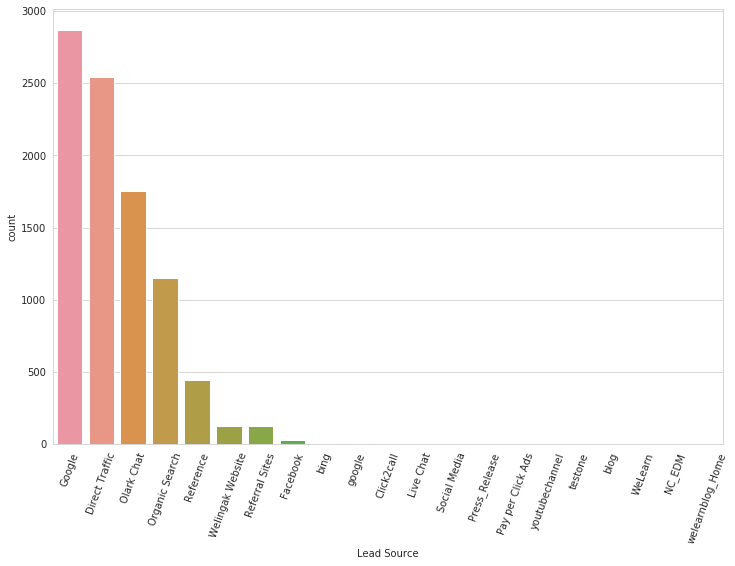

In [0]:
# To check the Frequency Plot
plt.figure(figsize=(12,8))
sns.countplot(df['Lead Source'], order =df['Lead Source'].value_counts().index)
plt.xticks(rotation=70)
plt.show()

In [0]:
df['Lead Source'].isnull().sum()

29

As number of null values is negligible, we can drop the rows with null values

In [0]:
df = df[~df['Lead Source'].isnull()]

In [0]:
# Checking the Null Values 
null = pd.DataFrame(round(100*(df.isnull().sum()/len(df)),2), columns = ['Null Values'])
null.sort_values(by='Null Values', ascending= False)

,Null Values
Prospect ID,0.0
Magazine,0.0
A free copy of Mastering The Interview,0.0
I agree to pay the amount through cheque,0.0
City,0.0
Get updates on DM Content,0.0
Update me on Supply Chain Content,0.0
Receive More Updates About Our Courses,0.0
Through Recommendations,0.0
Digital Advertisement,0.0


### Analysing outliers

Removing outliers

In [0]:
# Shape of the DF after removing the Outliers
df.shape

(9074, 27)

In [0]:
# Checking the Outlier using the IQR Method 
# If the values is < Q1 - ( 1.5 * IQR) and > Q3 + (1.5 * IQR) is considered as Outlier
df_numerical_col = df.select_dtypes(np.number).columns.tolist()
numdf = df[df_numerical_col]
Q1 = numdf.quantile(0.25)
Q3 = numdf.quantile(0.75)
IQR = Q3 - Q1
outlier_cnt_df = pd.DataFrame(((numdf < (Q1 - 1.5 * IQR)) | (numdf > ( Q3 + 1.5 * IQR))).sum(), columns= ['No of Outlier'])
outlier_cnt_df.sort_values(by = 'No of Outlier', ascending = False, inplace = True )

In [0]:
outlier_cnt_df

,No of Outlier
Page Views Per Visit,346
TotalVisits,267
Lead Number,0
Converted,0
Total Time Spent on Website,0


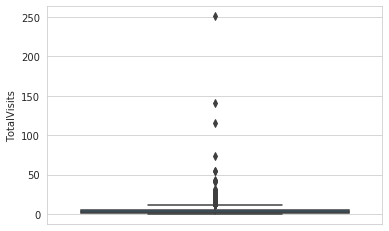

In [0]:
sns.boxplot(y=df.TotalVisits)

In [0]:
# To get the list of all the Index, which needs to be dropped and they are being considered as Outliers
set_list = []
numdf = df[df_numerical_col]
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
for col in IQR.index.tolist():
   set_list += (numdf[(numdf[col] < (Q1[col] - 1.5 * IQR[col])) | (numdf[col] > ( Q3[col] + 1.5 * IQR[col]))][col].index.tolist())
index_to_drop = list(set(set_list))
print(index_to_drop)

[2049, 8197, 2055, 10, 8203, 12, 6165, 8218, 4128, 2082, 6181, 4134, 6182, 8230, 41, 2096, 2102, 2103, 56, 57, 58, 2111, 2121, 6217, 8265, 6221, 8277, 6230, 8281, 4185, 8285, 102, 2154, 4204, 8312, 4219, 2172, 125, 6273, 8322, 2181, 2190, 4242, 2195, 4249, 6297, 4252, 6300, 168, 2219, 172, 173, 4269, 8365, 4275, 6325, 4281, 2235, 188, 2237, 8381, 191, 2244, 6343, 201, 4299, 6350, 2260, 8406, 6359, 229, 235, 4334, 238, 2289, 244, 246, 4344, 4349, 8446, 2307, 2309, 264, 8465, 2322, 2323, 8472, 281, 282, 4379, 8473, 4382, 292, 294, 4394, 303, 4399, 6453, 2367, 322, 6467, 4420, 6470, 8521, 2378, 331, 4428, 6484, 345, 4449, 2403, 6501, 2407, 2408, 2409, 8552, 2420, 4471, 375, 8573, 382, 6525, 387, 8599, 8604, 415, 4511, 417, 8609, 4518, 423, 8618, 8619, 427, 429, 430, 8623, 8624, 6580, 438, 4536, 4544, 4545, 8640, 8649, 2511, 6607, 6609, 8659, 4563, 469, 471, 4573, 4574, 8678, 8684, 6637, 2547, 6643, 4601, 2563, 521, 8715, 6669, 8720, 6680, 537, 8730, 6685, 4642, 549, 6695, 553, 554, 6700, 

In [0]:
print("Number of Index to be dropped {0}".format(len(index_to_drop)))
df.drop(index=index_to_drop, inplace = True)

Number of Index to be dropped 561


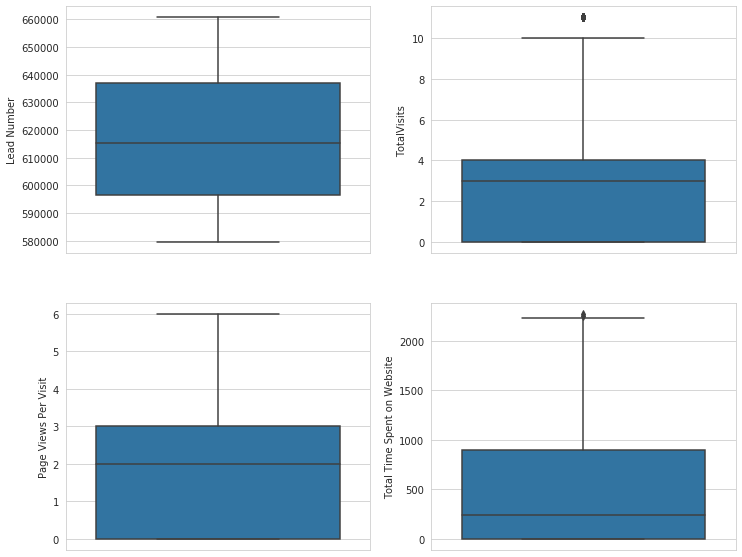

In [0]:
# So as to check the Data Spread after removing the Outliers
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(y=df['Lead Number'])

plt.subplot(2,2,2)
sns.boxplot(y=df['TotalVisits'])

plt.subplot(2,2,3)
sns.boxplot(y=df['Page Views Per Visit'])

plt.subplot(2,2,4)
sns.boxplot(y=df['Total Time Spent on Website'])

In [0]:
df.shape

(8513, 27)

### Univariate Analysis

In [0]:
# To Fetch all the Categorical columns
catcols = df.select_dtypes('object').columns.tolist()

In [0]:
df[catcols].head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,India,Unemployed,No,No,No,No,No,No,No,No,No,No,Unknown,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,India,Unemployed,No,No,No,No,No,No,No,No,No,No,Unknown,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Student,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,Converted to Lead,India,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


#### Analysing the variable 'Lead Origin'

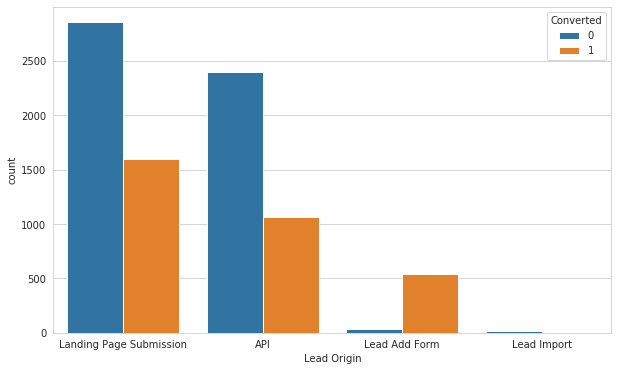

In [0]:
plt.figure(figsize=(10,6))
sns.countplot(df['Lead Origin'], hue = df['Converted'], order = df['Lead Origin'].value_counts().index)

Inference:
1. Origins that bring most of the leads are 'API' and 'Landing Page Submission' with the conversion rate around 40% - 50%
2. From the origin 'Lead Add Form' it is most likely the lead to be converted.


#### Analysing the variable 'Lead Source'

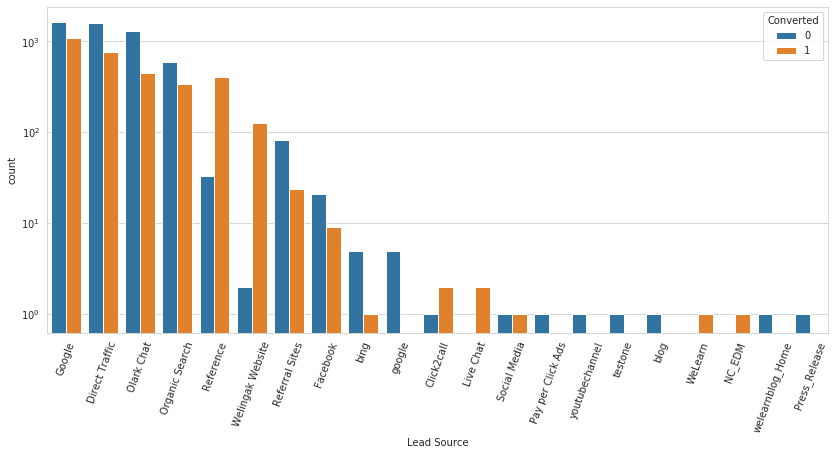

In [0]:
plt.figure(figsize=(14,6))
plt.yscale('log')
sns.countplot(df['Lead Source'], hue = df['Converted'], order=df['Lead Source'].value_counts().index)
plt.xticks(rotation=70)
plt.show()

In [0]:
#We can see the variable has two same sources with different names 'Google' and 'google', Hence, we'll change 'google' to 'Google
df['Lead Source'].replace({'google':'Google'}, inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

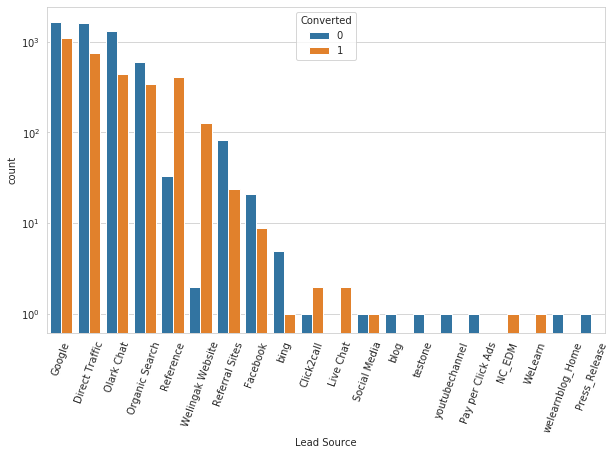

In [0]:
plt.figure(figsize=(10,6))
plt.yscale('log')
sns.countplot(df['Lead Source'], hue = df['Converted'],order=df['Lead Source'].value_counts().index)
plt.xticks(rotation=70)

We see that apart from top 5 categories, rest of the categories contribute very small amount of data, hence we can merge those categories as single category i.e., 'Others'.

In [0]:
cattokeep = df['Lead Source'].value_counts().index[0:5].tolist()
def LeadS(a):
  if a in cattokeep:
    return(a)
  else:
    return('Others')
df['Lead Source'] = df['Lead Source'].map(LeadS)

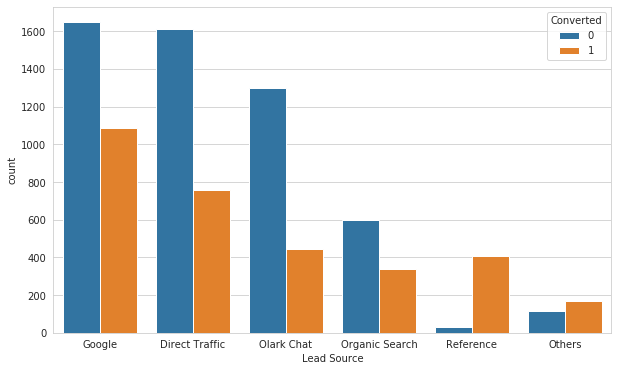

In [0]:
plt.figure(figsize=(10,6))
# plt.yscale('log')
sns.countplot(df['Lead Source'], hue = df['Converted'],order=df['Lead Source'].value_counts().index)
# plt.xticks(rotation=70)

Inference:
1. Sorces like 'Olark Chat', 'Organic Search', 'Direct Traffic', 'Google' brings most of the leads with significant conversion rate of around 30% -60% with 'Google' bringing the most conversion.
2. Leads from the source 'Reference' and 'Others' seems to bring the leads that are only to be converted.

#### Analysing the variable 'Do Not Email'

No     7860
Yes     653
Name: Do Not Email, dtype: int64


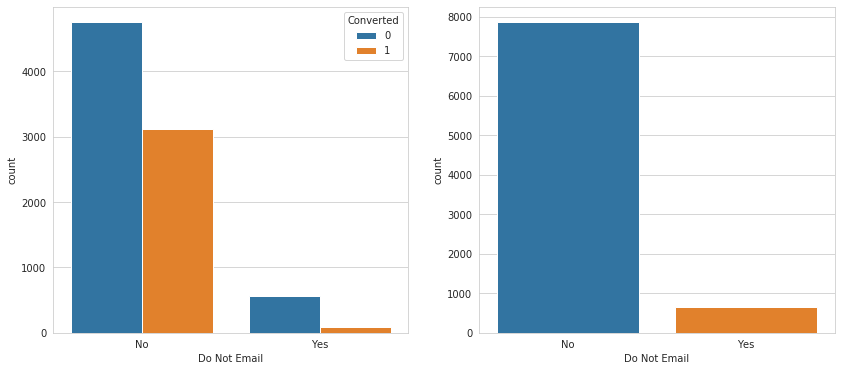

In [0]:
plt.figure(figsize=(14,6))
# plt.yscale('log')
plt.subplot(121)
sns.countplot(df['Do Not Email'], hue = df['Converted'])

plt.subplot(122)
sns.countplot(df['Do Not Email'])

# plt.xticks(rotation=70)
print(df['Do Not Email'].value_counts())

Inference:
1. As we can see, most of the leads opt for 'No' 
2. Inference for conversion rate can't be obtained from the above variable as we see similar rate for both the categories

#### Analysing the variable 'Do Not Call'

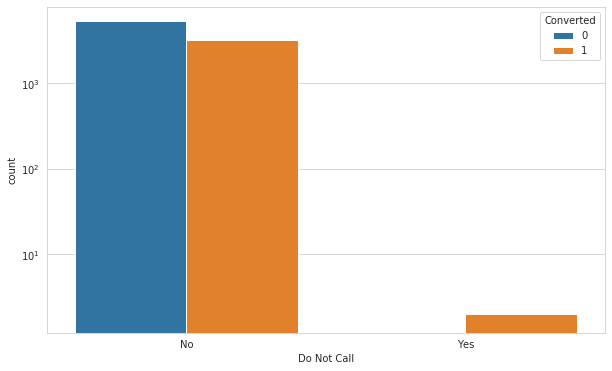

In [0]:
plt.figure(figsize=(10,6))
plt.yscale('log')
sns.countplot(df['Do Not Call'], hue = df['Converted'])
# plt.xticks(rotation=70)

In [0]:
df['Do Not Call'].value_counts()

No     8511
Yes       2
Name: Do Not Call, dtype: int64

Inference:
1. As we see, almost no one opts for Call.
2. We saw leads who opt for call, gets converted eventually.

In [0]:
#As the data is highly imbalanced, we can drop the column
df.drop(columns = 'Do Not Call', inplace = True)

#### Analysing variable 'Last Activity'

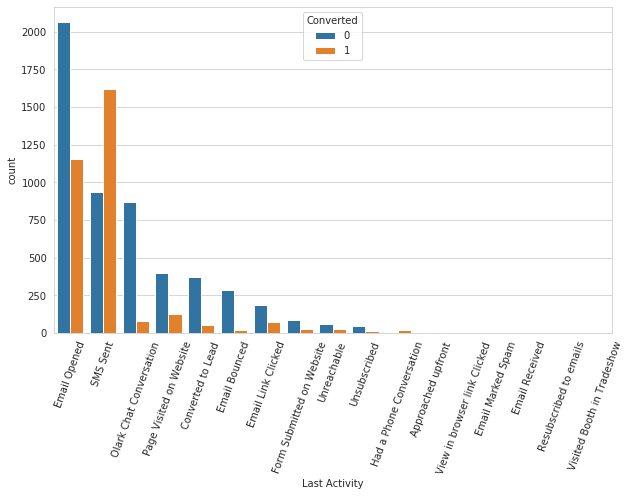

In [0]:
plt.figure(figsize=(10,6))
# plt.yscale('log')
sns.countplot(df['Last Activity'], hue = df['Converted'], order=df['Last Activity'].value_counts().index)
plt.xticks(rotation=70)
plt.show()

In [0]:
def lastnot(a):
  if a == 'Page Visited on Website':
    return(a)
  elif a == 'Email Opened':
    return(a)
  elif a=='SMS Sent':
    return(a)
  elif a == 'Olark Chat Conversation':
    return(a)
  elif a == 'Converted to Lead':
    return(a)
  else:
    return('Others')
df['Last Activity'] = df['Last Activity'].map(lastnot)

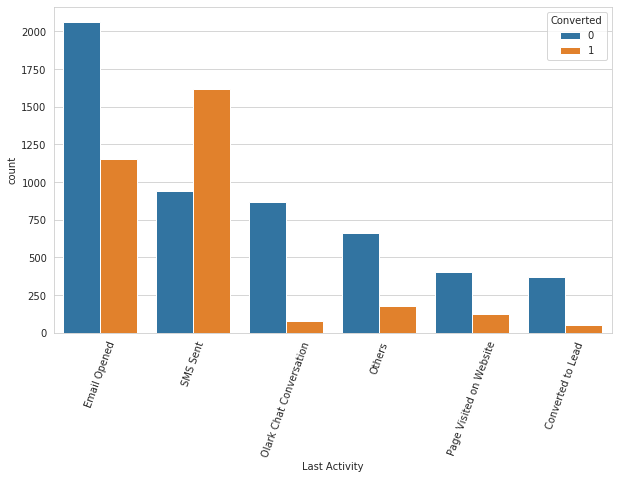

In [0]:
plt.figure(figsize=(10,6))
# plt.yscale('log')
sns.countplot(df['Last Activity'], hue = df['Converted'], order=df['Last Activity'].value_counts().index)
plt.xticks(rotation=70)
plt.show()

Inference:
1. For the category 'SMS Sent', gets the highest conversion. The company can get more conversions by implementing this method on a large scale

#### Analysing the variable 'Country'

In [0]:

dfcountry = pd.DataFrame(df['Country'].value_counts())

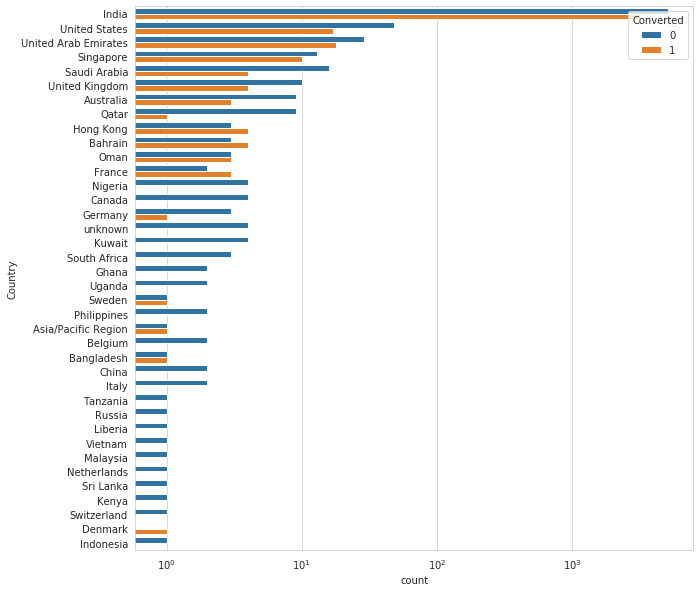

In [0]:
plt.figure(figsize=(10,10))
plt.xscale('log')
sns.countplot(y=df.Country,hue=df.Converted, order=df.Country.value_counts().index)

Inference:
1. Most of the leads are generated in 'India' whereas 'United States' has the most leads among all the countries but India.
2. Conversion rate is almost the same for all the countries

#### Analysing the variable 'What is your current occupation'

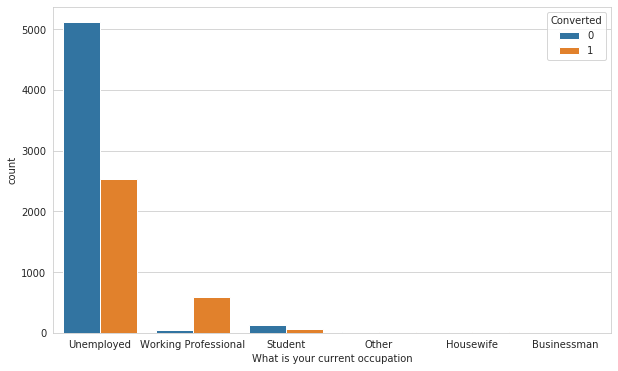

In [0]:
plt.figure(figsize=(10,6))
# plt.xscale('log')
sns.countplot(x=df['What is your current occupation'],hue=df.Converted, order=df['What is your current occupation'].value_counts().index)
# plt.xticks(rotation=60)

Inference:
1. For the 'Unemployed' leads are generated the most and conversion rate is almost 50%
2. 'Working Professional' are the leads who gets converted almost every time, reason may be that they are sure about their career path and what course they need to shape it up.

#### Analysing the variable 'Search'

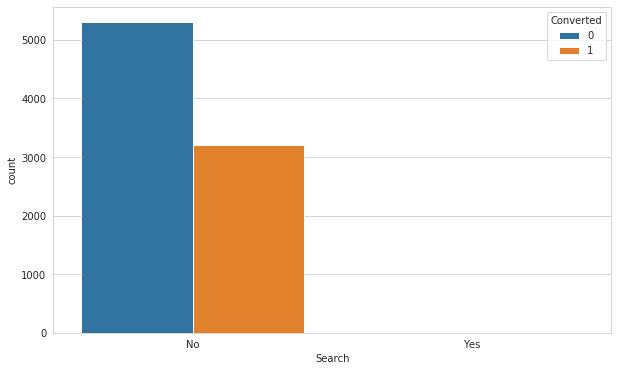

In [0]:
plt.figure(figsize=(10,6))
# plt.xscale('log')
sns.countplot(x=df['Search'],hue=df.Converted)
# plt.xticks(rotation=60)

In [0]:
df.Search.value_counts()

No     8505
Yes       8
Name: Search, dtype: int64

Inference:
1. From the above plot, we see there are only 8 entries for the category 'Yes' making the data highly imbalanced. Hence, we can drop the column

In [0]:
#As data is highly imbalanced, we can drop the columns
df.drop(columns='Search', inplace = True)

#### Analysing the variable 'Magazine'

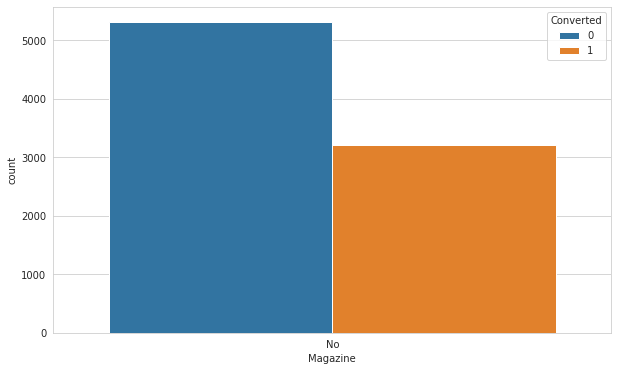

In [0]:
plt.figure(figsize=(10,6))
# plt.xscale('log')
sns.countplot(x=df['Magazine'],hue=df.Converted)
# plt.xticks(rotation=60)

In [0]:
df.Magazine.value_counts()

No    8513
Name: Magazine, dtype: int64

In [0]:
#As it is a variable with only one value, we can drop the column
df.drop(columns='Magazine',inplace=True)

In [0]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,No,No,No,No,No,No,No,No,Unknown,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Unemployed,No,No,No,No,No,No,No,No,Unknown,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Student,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,India,Unemployed,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


#### Checking if the following variables are imbalanced

In [0]:
print(df['Newspaper Article'].value_counts())
print('_____________________________________________')
print(df['X Education Forums'].value_counts())
print('_____________________________________________')
print(df['Newspaper'].value_counts())
print('_____________________________________________')
print(df['Digital Advertisement'].value_counts())
print('_____________________________________________')
print(df['Through Recommendations'].value_counts())
print('_____________________________________________')
print(df['Receive More Updates About Our Courses'].value_counts())
print('_____________________________________________')
print(df['Update me on Supply Chain Content'].value_counts())
print('_____________________________________________')
print(df['Get updates on DM Content'].value_counts())
print('_____________________________________________')
print(df['I agree to pay the amount through cheque'].value_counts())

No    8513
Name: Newspaper Article, dtype: int64
_____________________________________________
No    8513
Name: X Education Forums, dtype: int64
_____________________________________________
No     8512
Yes       1
Name: Newspaper, dtype: int64
_____________________________________________
No     8511
Yes       2
Name: Digital Advertisement, dtype: int64
_____________________________________________
No     8509
Yes       4
Name: Through Recommendations, dtype: int64
_____________________________________________
No    8513
Name: Receive More Updates About Our Courses, dtype: int64
_____________________________________________
No    8513
Name: Update me on Supply Chain Content, dtype: int64
_____________________________________________
No    8513
Name: Get updates on DM Content, dtype: int64
_____________________________________________
No    8513
Name: I agree to pay the amount through cheque, dtype: int64


In [0]:
#As these variables are overly imbalanced, we can simply drop these columns
colstodrop = ['Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
             'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

In [0]:
df.drop(columns=colstodrop, inplace=True)

In [0]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,Unknown,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Unknown,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Student,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,India,Unemployed,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Mumbai,No,Modified


#### Analysing the variable 'City'

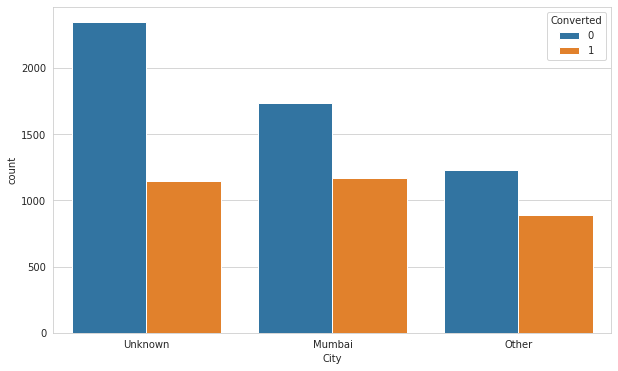

In [0]:
plt.figure(figsize=(10,6))
# plt.xscale('log')
sns.countplot(x=df['City'],hue=df.Converted)
# plt.xticks(rotation=60)

Inference:
1. We can see 'Mumbai' and 'Other' has high and similar conversion rate
2. Leads with 'Unknown' cities are comparitively less likely to converted but have significant rate of conversion

#### Analysing the variable 'A free copy of Mastering The Interview'

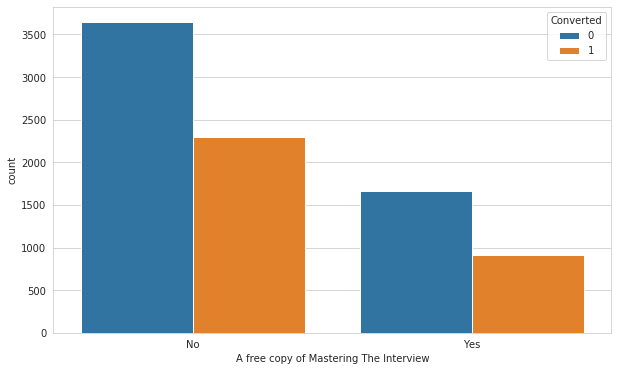

In [0]:
plt.figure(figsize=(10,6))
# plt.xscale('log')
sns.countplot(x=df['A free copy of Mastering The Interview'],hue=df.Converted)
# plt.xticks(rotation=60)

Inference:
1. There are almost similar rate of conversion for both the categories
2. Most of the leads don't opt for free copy of mastering the Interview

#### Analysing the variable 'Last Notable Activity'

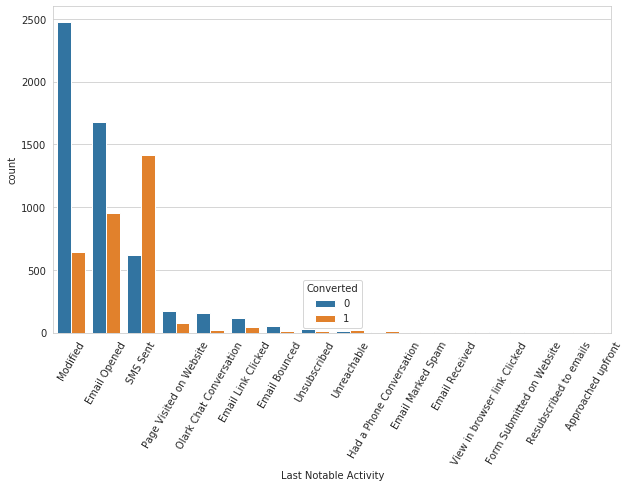

In [0]:
plt.figure(figsize=(10,6))
# plt.xscale('log')
sns.countplot(x=df['Last Notable Activity'],hue=df.Converted, order=df['Last Notable Activity'].value_counts().index)
plt.xticks(rotation=60)
plt.show()

Most of the datas belong to the top 3 categories, We can sum up other counts of remaining categories as single category.

In [0]:
def lastnot(a):
  if a == 'Modified':
    return('Modified')
  elif a == 'Email Opened':
    return('Email Opened')
  elif a=='SMS Sent':
    return('SMS Sent')
  else:
    return('Others')
df['Last Notable Activity'] = df['Last Notable Activity'].map(lastnot)

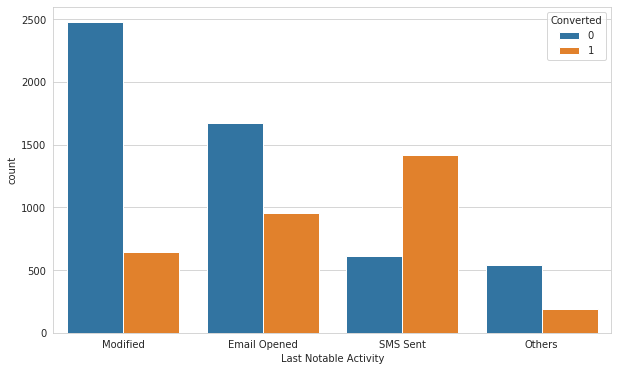

In [0]:
plt.figure(figsize=(10,6))
# plt.xscale('log')
sns.countplot(x=df['Last Notable Activity'],hue=df.Converted, order=df['Last Notable Activity'].value_counts().index)
# plt.xticks(rotation=60)
plt.show()

Inference:
1. For the category 'SMS Sent', gets the highest conversion.
2. Coversion rate for 'Modified' is comparitively low but has significant number of lead counts.

In [0]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,Unknown,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Unknown,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Student,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,India,Unemployed,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Mumbai,No,Modified


### Analysing Numerical Variables

#### Looking into the variable 'TotalVisits'

In [0]:
# As we found out that Total Visits is a Ordered Categorical Value
df.TotalVisits.value_counts()

0.0     2161
2.0     1679
3.0     1306
4.0     1120
5.0      783
6.0      466
1.0      395
7.0      184
8.0      141
9.0      119
10.0      91
11.0      68
Name: TotalVisits, dtype: int64

In [0]:
# So as to check the data distribution, the data type was converted to Numeric
df['TotalVisits'] = df['TotalVisits'].astype('int64')

(array([2556., 1679., 1306., 1120.,  783.,  466.,  184.,  141.,  119.,
         159.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

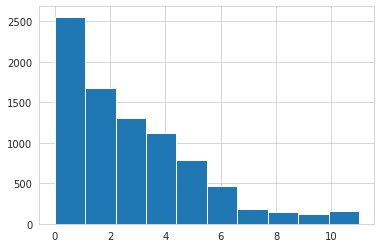

In [0]:
# To check the distribution of the TotalVisits
plt.hist(df.TotalVisits)

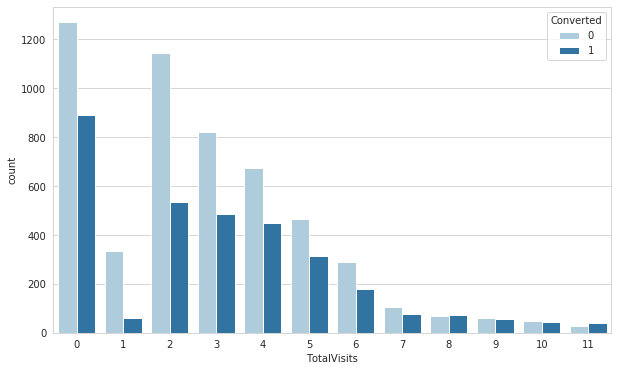

In [0]:
#We can plot countplot for the same as it seems more of a categorical variable
plt.figure(figsize=(10,6))
sns.countplot(df.TotalVisits, hue=df.Converted, palette='Paired')

The above variables seems like a categorical variables with only 12 values, hence we can categorise the variable in 3 different categories 'Rarely', 'Sometimes' and 'Frequently'

In [0]:
#Creating new column and Binning them in three criteria
df['Visited'] = pd.cut(df.TotalVisits, bins=3, labels=['Rarely', 'Sometimes', 'Frequently'])

In [0]:
#Dropping 'TotalVisits'
df.drop(columns='TotalVisits', inplace=True)

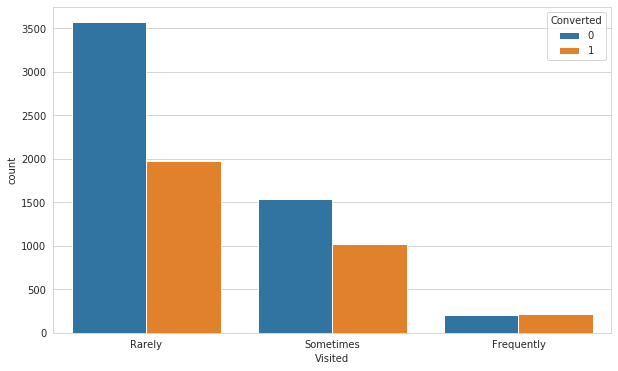

In [0]:
plt.figure(figsize=(10,6))
sns.countplot(df.Visited, hue=df.Converted)

Inference:
1. Lead who visits 'Sometimes' seem to have highers conversion chance in comparison to the lead who 'Rarely' visit.
2. Lead visiting Frequently has the highest chance of conversion.

#### Analysing 'Total Time Spent on Website'

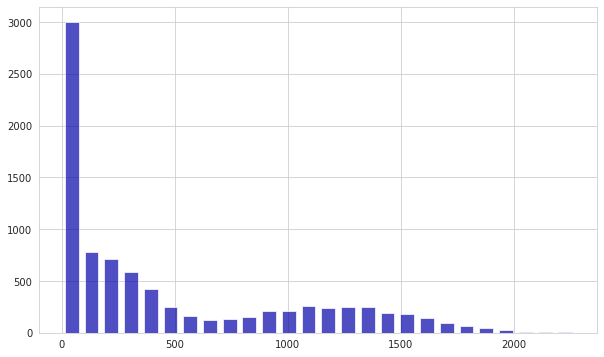

In [0]:
# To check the data spread
plt.figure(figsize=(10,6))
plt.hist(x=df['Total Time Spent on Website'], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.70)
plt.show()

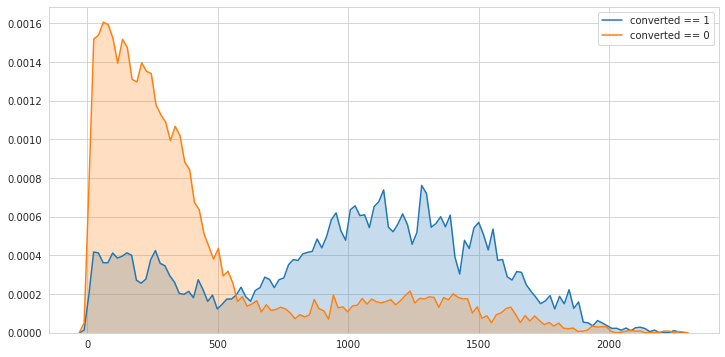

In [0]:
# To check the Distribution of the Field wrt to Category
plt.figure(figsize=(12,6))
sns.kdeplot(df.loc[df['Converted']==1, 'Total Time Spent on Website'], label = 'converted == 1', shade=True, bw = 10)
sns.kdeplot(df.loc[df['Converted']==0, 'Total Time Spent on Website'], label = 'converted == 0', shade=True, bw = 10)

Inference:
1. Leads who spend more than 500, are more likely to get converted.
2. Leads spending less than 500 seems to be converted very less

#### Analysing 'Page Views Per Visit'

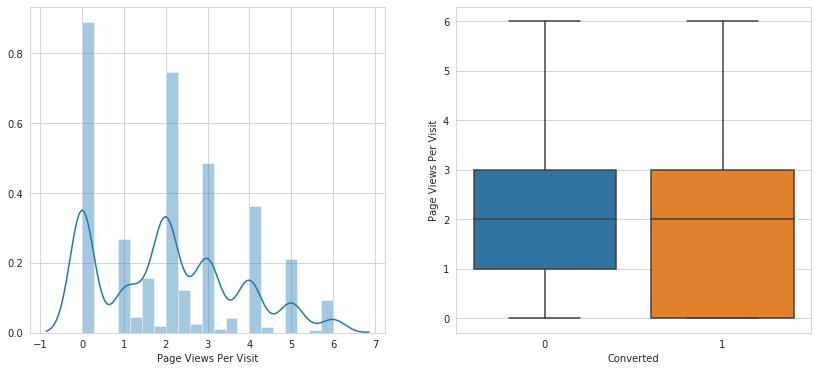

In [0]:
# To check the distributions, of the Numerical column
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.distplot(df['Page Views Per Visit'])

plt.subplot(122)
sns.boxplot(y=df['Page Views Per Visit'], x=df['Converted'])
plt.show()

Inference:
1. It is more of a continuous variable for the average.
2. Most of the leads that are Not Converted, lies between 1-3 and the leads that are converted lies between 0-3.

In [0]:
# So as to see what are the category and what are those data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8513 entries, 0 to 9239
Data columns (total 15 columns):
Prospect ID                               8513 non-null object
Lead Number                               8513 non-null int64
Lead Origin                               8513 non-null object
Lead Source                               8513 non-null object
Do Not Email                              8513 non-null object
Converted                                 8513 non-null int64
Total Time Spent on Website               8513 non-null int64
Page Views Per Visit                      8513 non-null float64
Last Activity                             8513 non-null object
Country                                   8513 non-null object
What is your current occupation           8513 non-null object
City                                      8513 non-null object
A free copy of Mastering The Interview    8513 non-null object
Last Notable Activity                     8513 non-null object
Visited      

In [0]:
df.reset_index(drop=True, inplace=True)

In [0]:
# Prior to dropping just keeping a copy for Inference
# So as to take the IDs of the feature
lead_df = df[['Prospect ID', 'Lead Number']]
df.drop(['Prospect ID','Lead Number'], axis = 1, inplace = True)

### Creating Dummy Variables

In [0]:
# To check the Categorical and Numerical Columns
catcolumns = df.select_dtypes(['category','object']).columns.tolist()
numcolumns = df.select_dtypes(np.number).columns.tolist()

In [0]:
# To get the dummies for all the categorical columns
dummies = pd.get_dummies(df[catcolumns], drop_first=True, dummy_na=True)

In [0]:
# To drop NaN columns
coltodrop = [x for x in dummies.columns if 'nan' in x]

In [0]:
# To drop the NaN
dummies.drop(columns=coltodrop, inplace = True)

In [0]:
# To form the columns by concatenating the Numerical and Categorical Columns
dffinal = pd.concat([df[numcolumns], dummies], axis=1)

In [0]:
# Final DF how does it look
dffinal.head()

,Converted,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Do Not Email_Yes,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other,City_Unknown,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent,Visited_Sometimes,Visited_Frequently
0,0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
1,0,674,2.5,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2,1,1532,2.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,1,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


### Splitting into train and test sets

In [0]:
y = dffinal.pop('Converted')
X = dffinal

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.70, random_state = 56)

In [0]:
print("Shape of X Train {0}".format(X_train.shape))
print("Shape of Y Train {0}".format(y_train.shape))
print("Shape of X Test {0}".format(X_test.shape))
print("Shape of Y Test {0}".format(y_test.shape))

Shape of X Train (5959, 66)
Shape of Y Train (5959,)
Shape of X Test (2554, 66)
Shape of Y Test (2554,)


### Scaling the dataset

In [0]:
# Scaling of the dataframe so as to have mean of 0 and sd 1
numcolumns.remove('Converted')
scaler = StandardScaler()
X_train[numcolumns] = scaler.fit_transform(X_train[numcolumns])

In [0]:
X_test[numcolumns] = scaler.transform(X_test[numcolumns])
X_train.head()

,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Do Not Email_Yes,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other,City_Unknown,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent,Visited_Sometimes,Visited_Frequently
6136,1.953702,0.557436,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7902,1.275707,-0.047494,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
7650,-0.588779,-0.047494,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
3475,-0.415595,1.162366,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
7745,-0.866978,-1.257353,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0


### Plotting correlation matrix

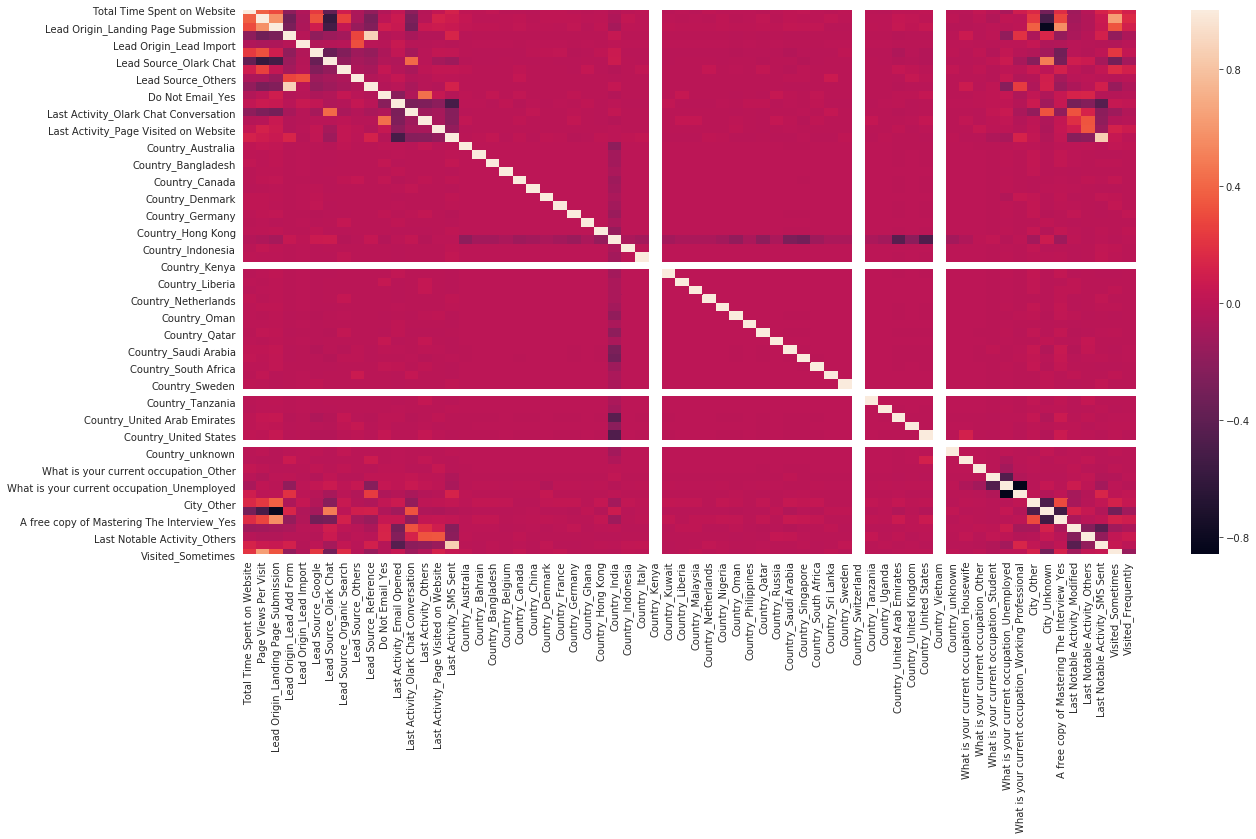

In [0]:
# To check what are the correlation and to check whether there exists some multicollinearity or not
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr())

Inference:
As we can see in the corners, there are negative as well as positive correlations among the variables.

### Model Building without removing any feature

In [0]:
# Model Building 1
X_train_sm = sm.add_constant(X_train)
logr1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logr1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5895
Model Family:                Binomial   Df Model:                           63
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2406.3
Date:                Fri, 15 Nov 2019   Deviance:                       4812.6
Time:                        11:50:47   Pearson chi2:                 6.71e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0665      3.300     -0.323      0.747      -7.534       5.401
Total Time Spent on Website                              1.0556      0.042     25.053      0.000       0.973       1.138
Page Views Per Visit                                    -0.1895      0.068     -2.789      0.005      -0.323      -0.056
Lead Origin_Landing Page Submission                     -0.9280      0.152     -6.088      0.000      -1.227      -0.629
Lead Origin_Lead Add Form                                4.8508      0.608      7.981      0.000       3.660       6.042
Lead Origin_Lead Import                                  0.1673      0.619      0.270      0.787      -1.046       1.381
Lead Source_Google                                       0.1200      0.124      0.965      0.334      -0.124       0.364
Lead Source_Olark Chat                                   1.0893      0.178      6.105      0.000       0.740       1.439
Lead Source_Organic Search                               0.0797      0.143      0.556      0.578      -0.201       0.360
Lead Source_Others                                       0.0625      0.318      0.197      0.844      -0.560       0.685
Lead Source_Reference                                   -1.4450      0.646     -2.235      0.025      -2.712      -0.178
Do Not Email_Yes                                        -1.3131      0.185     -7.108      0.000      -1.675      -0.951
Last Activity_Email Opened                               0.7633      0.246      3.107      0.002       0.282       1.245
Last Activity_Olark Chat Conversation                   -0.8156      0.275     -2.968      0.003      -1.354      -0.277
Last Activity_Others                                     0.4038      0.261      1.546      0.122      -0.108       0.916
Last Activity_Page Visited on Website                    0.0525      0.279      0.188      0.851      -0.494       0.599
Last Activity_SMS Sent                                   1.0560      0.251      4.208      0.000       0.564       1.548
Country_Australia                                       -1.1956      3.152     -0.379      0.704      -7.373       4.982
Country_Bahrain                                          0.6368      3.332      0.191      0.848      -5.893       7.167
Country_Bangladesh                                      -0.3583      3.317     -0.108      0.914      -6.860       6.143
Country_Belgium                                        -21.9927   7.86e+04     -0.000      1.000   -1.54e+05    1.54e+05
Country_Canada                                         -22.8419   3.84e+04     -0.001      1.000   -7.53e+04    7.52e+04
Country_China                                          -21

In [0]:
# Prediction probablity of the Features and how does this looks like
y_train_pred = res.predict(X_train_sm)
y_train_pred

6136    0.624377
7902    0.806358
7650    0.018936
3475    0.793236
7745    0.047320
          ...   
87      0.047320
233     0.083440
3264    0.083440
399     0.066514
2532    0.589837
Length: 5959, dtype: float64

In [0]:
# For now the probability cutoff was taken as 0.5
y_train_pred1 = y_train_pred.map(lambda x: 1 if x > 0.5 else 0)

In [0]:
# Confusion Matrix
confusion_matrix(y_train, y_train_pred1)

array([[3275,  426],
       [ 662, 1596]])

In [0]:
print("Accuracy Score {0}".format(round(accuracy_score(y_train, y_train_pred1),2)))

Accuracy Score 0.82


In [0]:
# To check what is the ROC curve and to also check what is the AUC
def draw_roc( actual, probs ):
   fpr, tpr, thresholds = roc_curve( actual, probs,
                                             drop_intermediate = False )
   auc_score = roc_auc_score( actual, probs )
   plt.figure(figsize=(6, 6))
   plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
   plt.plot([0, 1], [0, 1], 'k--')
   plt.xlim([0.0, 1.0])
   plt.ylim([0.0, 1.05])
   plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
   plt.ylabel('True Positive Rate')
   plt.title('Receiver operating characteristic example')
   plt.legend(loc="lower right")
   plt.show()

   return fpr, tpr, thresholds

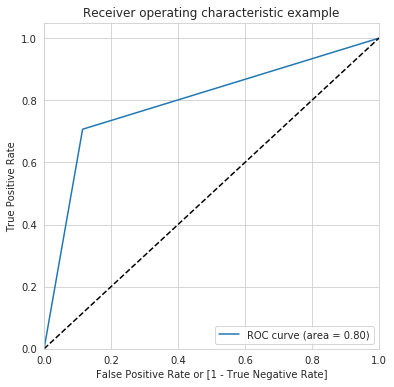

(array([0.        , 0.11510403, 1.        ]),
 array([0.        , 0.70682019, 1.        ]),
 array([2, 1, 0]))

In [0]:
draw_roc(y_train, y_train_pred1)

In [0]:
# Model Building 1
X_train_sm = sm.add_constant(X_train)
logr1 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
logr1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5895
Model Family:                Binomial   Df Model:                           63
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2406.3
Date:                Fri, 15 Nov 2019   Deviance:                       4812.6
Time:                        11:50:49   Pearson chi2:                 6.71e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0665      3.300     -0.323      0.747      -7.534       5.401
Total Time Spent on Website                              1.0556      0.042     25.053      0.000       0.973       1.138
Page Views Per Visit                                    -0.1895      0.068     -2.789      0.005      -0.323      -0.056
Lead Origin_Landing Page Submission                     -0.9280      0.152     -6.088      0.000      -1.227      -0.629
Lead Origin_Lead Add Form                                4.8508      0.608      7.981      0.000       3.660       6.042
Lead Origin_Lead Import                                  0.1673      0.619      0.270      0.787      -1.046       1.381
Lead Source_Google                                       0.1200      0.124      0.965      0.334      -0.124       0.364
Lead Source_Olark Chat                                   1.0893      0.178      6.105      0.000       0.740       1.439
Lead Source_Organic Search                               0.0797      0.143      0.556      0.578      -0.201       0.360
Lead Source_Others                                       0.0625      0.318      0.197      0.844      -0.560       0.685
Lead Source_Reference                                   -1.4450      0.646     -2.235      0.025      -2.712      -0.178
Do Not Email_Yes                                        -1.3131      0.185     -7.108      0.000      -1.675      -0.951
Last Activity_Email Opened                               0.7633      0.246      3.107      0.002       0.282       1.245
Last Activity_Olark Chat Conversation                   -0.8156      0.275     -2.968      0.003      -1.354      -0.277
Last Activity_Others                                     0.4038      0.261      1.546      0.122      -0.108       0.916
Last Activity_Page Visited on Website                    0.0525      0.279      0.188      0.851      -0.494       0.599
Last Activity_SMS Sent                                   1.0560      0.251      4.208      0.000       0.564       1.548
Country_Australia                                       -1.1956      3.152     -0.379      0.704      -7.373       4.982
Country_Bahrain                                          0.6368      3.332      0.191      0.848      -5.893       7.167
Country_Bangladesh                                      -0.3583      3.317     -0.108      0.914      -6.860       6.143
Country_Belgium                                        -21.9927   7.86e+04     -0.000      1.000   -1.54e+05    1.54e+05
Country_Canada                                         -22.8419   3.84e+04     -0.001      1.000   -7.53e+04    7.52e+04
Country_China                                          -21

1. As we see, for most of the variables, p value is very high or 1. 
2. Correlation among the some of the variables are high and negative.
3. Data seems to be linear

We need to give better and appropriate features to out model to improve result.


### Dimensionality Reduction using PCA

In [0]:
pca = PCA(random_state=56)

In [0]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=56,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
# To check the principal Components
pca.components_

array([[ 5.42950637e-01,  6.58061982e-01,  2.56616943e-01, ...,
         4.56828423e-02,  1.96266426e-01,  2.52510157e-02],
       [ 8.08162886e-01, -4.59148705e-01, -1.72478528e-01, ...,
         1.06118778e-01, -1.74393248e-01,  1.05470711e-03],
       [-1.79762960e-01,  5.49471073e-02,  2.12029985e-03, ...,
         5.67512144e-01,  2.99266190e-02, -6.35230131e-03],
       ...,
       [-0.00000000e+00,  3.77909421e-19, -2.07722360e-19, ...,
        -2.09047731e-18,  7.18283939e-19, -5.21772296e-19],
       [-0.00000000e+00,  9.09927674e-19,  6.59562255e-19, ...,
        -9.23265913e-20, -3.99376035e-19,  2.18005105e-19],
       [ 0.00000000e+00,  1.02999206e-17,  5.04719409e-19, ...,
        -5.55111512e-17,  0.00000000e+00,  3.46944695e-17]])

In [0]:
# To check the explained variance
pca.explained_variance_ratio_

array([3.38886170e-01, 1.31632250e-01, 8.82816842e-02, 7.86939577e-02,
       6.19914925e-02, 4.22609734e-02, 3.22310311e-02, 3.09015070e-02,
       2.70026148e-02, 2.51802201e-02, 2.17560237e-02, 1.83679410e-02,
       1.43019452e-02, 1.33328073e-02, 1.22874192e-02, 9.52939932e-03,
       8.51054478e-03, 7.05634776e-03, 6.60972425e-03, 6.10421528e-03,
       5.72489661e-03, 5.62163451e-03, 3.31553397e-03, 2.33732606e-03,
       1.40547747e-03, 1.19653421e-03, 8.12433054e-04, 7.92475554e-04,
       5.07450627e-04, 3.97940939e-04, 3.59911290e-04, 3.48723361e-04,
       2.42078825e-04, 2.21633312e-04, 2.00451333e-04, 1.70008308e-04,
       1.38923291e-04, 1.13010548e-04, 9.46378382e-05, 8.43140675e-05,
       8.07433230e-05, 6.35672534e-05, 6.35556797e-05, 6.35330561e-05,
       6.34730868e-05, 6.34603304e-05, 6.33468208e-05, 6.32656930e-05,
       6.31709978e-05, 4.10337222e-05, 3.17845772e-05, 3.17576777e-05,
       3.17526040e-05, 3.17386590e-05, 3.17315021e-05, 3.16779476e-05,
      

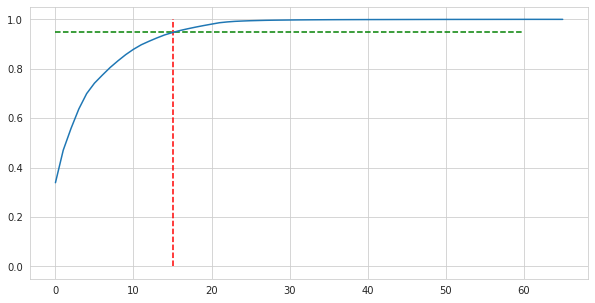

In [0]:
# To check the SCREE Plot and to decide what should be the ideal number of principal components
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.hlines(y=0.95,xmax=60,xmin=0, colors='g',linestyles='--')
plt.vlines(x=15,ymax=1,ymin=0, colors='r',linestyles='--')
plt.show()

From the above plot, it can be colcluded that 15 components will be able to explain 95% of the variance of the data.

In [0]:
pca = IncrementalPCA(n_components=15)

In [0]:
X_train_PCA = pca.fit_transform(X_train)

In [0]:
# Transform the DF with the new Principal Components
X_train_PCA_df = pd.DataFrame(X_train_PCA)
for i in range(1,len(X_train_PCA_df.columns)+1):
  X_train_PCA_df.rename(columns = {i-1:'PCA{0}'.format(i)}, inplace=True)

### Visualising the correlation

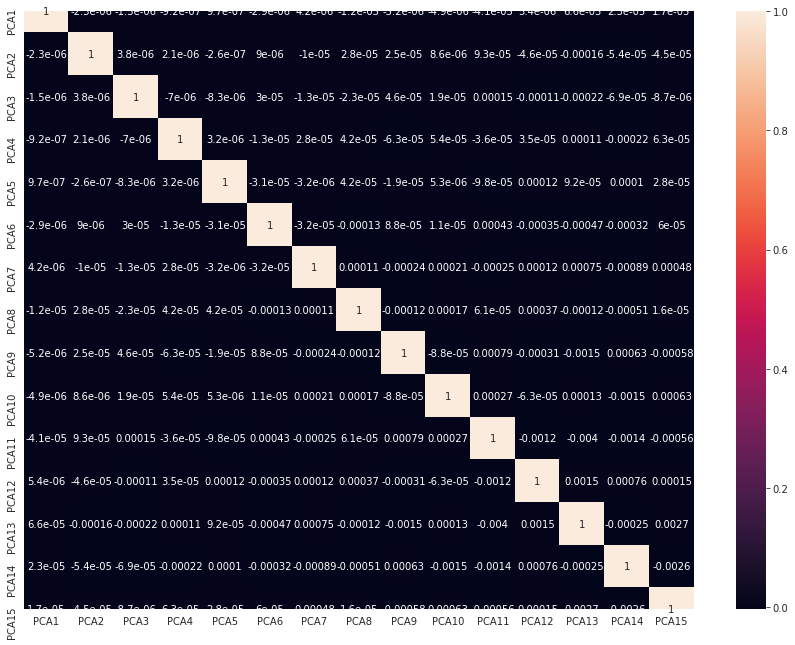

In [0]:
# To check now what is the multicollinearity, after applying the PCA
plt.figure(figsize=(15,11))
sns.heatmap(X_train_PCA_df.corr(), annot =True)

The heatmap above shows there are zero correlation among the variables obtained after PCA.

In [0]:
# Applying to Test Data Frame after applying the PCA
X_test_PCA = pca.transform(X_test)

In [0]:
# Model Building 3
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr3 = sm.GLM(y_train,X_train_PCA_sm, family=sm.families.Binomial())
res = logr3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5943
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.3
Date:                Fri, 15 Nov 2019   Deviance:                       5220.5
Time:                        11:50:51   Pearson chi2:                 6.19e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6237      0.036    -17.122      0.000      -0.695      -0.552
x1             0.3469      0.027     12.707      0.000       0.293       0.400
x2             1.3175      0.046     28.431      0.000       1.227       1.408
x3             1.2237      0.051     24.089      0.000       1.124       1.323
x4             0.3922      0.054      7.296      0.000       0.287       0.498
x5            -1.3173      0.068    -19.283      0.000      -1.451      -1.183
x6             0.2160      0.073      2.951      0.003       0.073       0.359
x7            -1.8010      0.103    -17.464      0.000      -2.003      -1.599
x8             0.8443      0.094      8.983      0.000       0.660       1.029
x9             0.7998      0.093      8.585      0.000       0.617       0.982
x10           -0.3669      0.103     -3.566      0.000      -0.568      -0.165
x11            0.3092      0.102      3.037      0.002       0.110       0.509
x12           -0.0862      0.123     -0.701      0.483      -0.327       0.155
x13           -0.3195      0.126     -2.526      0.012      -0.567      -0.072
x14           -1.0127      0.133     -7.592      0.000      -1.274      -0.751
x15           -0.3715      0.148     -2.505      0.012      -0.662      -0.081
==============================================================================
"""

In [0]:
#As x12 has p-value 0.483 which is very large, we may drop it
X_train_PCA_df.drop(columns='PCA12', axis = 1, inplace=True)

In [0]:
X_train_PCA = X_train_PCA_df.values

In [0]:
# Model Building 4
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr4 = sm.GLM(y_train,X_train_PCA_sm, family=sm.families.Binomial())
res = logr4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5944
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.5
Date:                Fri, 15 Nov 2019   Deviance:                       5221.0
Time:                        11:50:51   Pearson chi2:                 6.18e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6249      0.036    -17.166      0.000      -0.696      -0.554
x1             0.3489      0.027     12.843      0.000       0.296       0.402
x2             1.3168      0.046     28.426      0.000       1.226       1.408
x3             1.2221      0.051     24.100      0.000       1.123       1.322
x4             0.3941      0.054      7.332      0.000       0.289       0.499
x5            -1.3152      0.068    -19.295      0.000      -1.449      -1.182
x6             0.2177      0.073      2.976      0.003       0.074       0.361
x7            -1.7994      0.103    -17.460      0.000      -2.001      -1.597
x8             0.8478      0.094      9.040      0.000       0.664       1.032
x9             0.7951      0.093      8.554      0.000       0.613       0.977
x10           -0.3603      0.102     -3.515      0.000      -0.561      -0.159
x11            0.3105      0.102      3.050      0.002       0.111       0.510
x12           -0.3108      0.126     -2.469      0.014      -0.557      -0.064
x13           -1.0108      0.133     -7.579      0.000      -1.272      -0.749
x14           -0.3767      0.149     -2.527      0.011      -0.669      -0.085
==============================================================================
"""

The model when fit on the PCA reduced dimensions, it gave the summary as above where we can see for every variables obtained has value of p-value < 0.05.

In [0]:
# To check the VIF Score so as to see whether some correlation still exist
vif = pd.DataFrame()
vif['features'] = X_train_PCA_df.columns
vif['vif'] = [variance_inflation_factor(X_train_PCA_df.values, i) for i in range(len(X_train_PCA_df.columns))]
vif

,features,vif
0,PCA1,1.000000
1,PCA2,1.000000
2,PCA3,1.000000
3,PCA4,1.000000
4,PCA5,1.000000
5,PCA6,1.000001
6,PCA7,1.000002
7,PCA8,1.000000
8,PCA9,1.000004
9,PCA10,1.000003


Predicting y_train and giving the cut-off probability as 0.5 for now

In [0]:
# Creating a DF so as to hold all the infomtion related to prediction
preddf = pd.DataFrame({'Actual':y_train})
preddf.head()

,Actual
6136,0
7902,1
7650,0
3475,0
7745,0


In [0]:
# Creating a DF so as to hold all the infomtion related to prediction
y_train_pred_prob = res.predict(X_train_PCA_sm)
preddf['Probability'] = y_train_pred_prob
preddf['Predicted'] = preddf['Probability'].map(lambda x : 1 if x > 0.5 else 0)
preddf.head()

,Actual,Probability,Predicted
6136,0,0.594928,1
7902,1,0.844991,1
7650,0,0.038458,0
3475,0,0.763190,1
7745,0,0.057885,0


In [0]:
accuracy_score(preddf.Actual, preddf.Predicted)

0.7992951837556637

In [0]:
confusion_matrix(preddf.Actual, preddf.Predicted)

array([[3220,  481],
       [ 715, 1543]])

#### Finding the optimal cut-off probability

In [0]:
# To find the prediction for each possible probability
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    preddf[i]=  preddf.Probability.map(lambda x: 1 if x > i else 0)
preddf.head()

,Actual,Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
6136,0,0.594928,1,1,1,1,1,1,1,0,0,0,0
7902,1,0.844991,1,1,1,1,1,1,1,1,1,1,0
7650,0,0.038458,0,1,0,0,0,0,0,0,0,0,0
3475,0,0.763190,1,1,1,1,1,1,1,1,1,0,0
7745,0,0.057885,0,1,0,0,0,0,0,0,0,0,0


In [0]:
# let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['cutoff','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
   cm1 = confusion_matrix(preddf.Actual, preddf[i] )
   total1=sum(sum(cm1))
   accuracy = (cm1[0,0]+cm1[1,1])/total1
   
   speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
   sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
   cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     cutoff  accuracy     sensi     speci
0.0     0.0  0.378923  1.000000  0.000000
0.1     0.1  0.583319  0.966785  0.349365
0.2     0.2  0.723611  0.910097  0.609835
0.3     0.3  0.783185  0.831267  0.753850
0.4     0.4  0.797953  0.775908  0.811402
0.5     0.5  0.799295  0.683348  0.870035
0.6     0.6  0.788052  0.565102  0.924075
0.7     0.7  0.768418  0.467228  0.952175
0.8     0.8  0.743078  0.368025  0.971899
0.9     0.9  0.698104  0.222764  0.988111


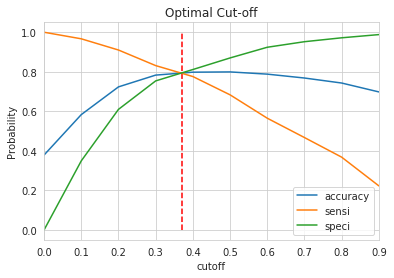

In [0]:
#Checking the Optimal Cut-off for the above model
cutoff_df.plot.line(x='cutoff', y=['accuracy','sensi','speci'])
plt.vlines(0.37, ymax=1, ymin=0, colors='r', linestyles='--')
plt.ylabel('Probability', fontsize = 10)
plt.title('Optimal Cut-off')
plt.show()

From the above plot, the optimal cut-off can be obtained as **0.37**

In [0]:
#Creating a separate dataframe for predicted values on every different cut-offs
preddf['Opt Cutoff'] = preddf['Probability'].map(lambda x : 1 if x > 0.37 else 0)
preddf.head()

,Actual,Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Opt Cutoff
6136,0,0.594928,1,1,1,1,1,1,1,0,0,0,0,1
7902,1,0.844991,1,1,1,1,1,1,1,1,1,1,0,1
7650,0,0.038458,0,1,0,0,0,0,0,0,0,0,0,0
3475,0,0.763190,1,1,1,1,1,1,1,1,1,0,0,1
7745,0,0.057885,0,1,0,0,0,0,0,0,0,0,0,0


Looking through Confusion metrices

In [0]:
confusion_matrix(preddf.Actual, preddf['Opt Cutoff'])

array([[2943,  758],
       [ 474, 1784]])

In [0]:
confusion_matrix(preddf.Actual, preddf.Predicted)

array([[3220,  481],
       [ 715, 1543]])

In [0]:
#Checking Accuracy Score
accuracy_score(preddf.Actual, preddf['Opt Cutoff'])

0.7932539016613526

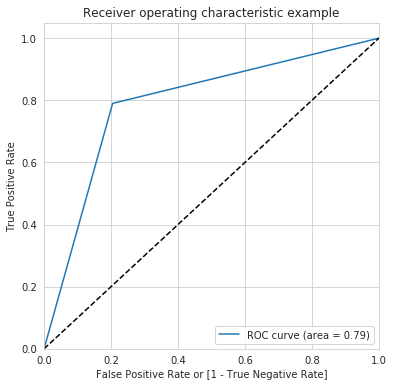

(array([0.        , 0.20480951, 1.        ]),
 array([0.        , 0.79007972, 1.        ]),
 array([2, 1, 0]))

In [0]:
#Checking ROC Curver and Area under curve
draw_roc(preddf.Actual, preddf['Opt Cutoff'])

#### Predicting X_test

In [0]:
# Convert X Test to dataframe
X_test_PCA_df = pd.DataFrame(X_test_PCA)
for i in range(1,len(X_test_PCA_df.columns)+1):
  X_test_PCA_df.rename(columns = {i-1:'PCA{0}'.format(i)}, inplace=True)
X_test_PCA_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15
0,-0.189753,-0.902485,-0.163297,0.996692,0.809819,0.252080,-0.120344,-0.313457,0.221890,0.177632,-0.133440,-0.253064,0.211851,0.016240,-0.100307
1,-2.049250,0.143066,-0.278785,-0.298130,0.696312,-0.270638,0.187213,-0.311229,0.278906,-0.408070,-0.110853,-0.153263,-0.129405,-0.114432,0.251631
2,1.356763,1.225473,-0.880715,1.225381,-0.282865,-0.134899,0.153262,-0.224507,0.182672,0.205348,-0.069142,-0.127855,0.142035,-0.116705,0.032883
3,0.658164,-1.247900,1.420365,-1.246563,-0.303391,-1.184466,-0.170676,-0.047520,0.084378,0.440710,0.002555,0.116410,-0.005754,0.215865,0.103972
4,2.296219,0.824054,0.853332,0.240410,0.116079,-0.641208,0.225729,-0.146651,-0.288954,-0.417863,0.447839,-0.040880,0.102119,-0.295332,-0.000999


In [0]:
X_test_PCA_df = X_test_PCA_df[X_train_PCA_df.columns.tolist()]
X_test_PCA_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA13,PCA14,PCA15
0,-0.189753,-0.902485,-0.163297,0.996692,0.809819,0.252080,-0.120344,-0.313457,0.221890,0.177632,-0.133440,0.211851,0.016240,-0.100307
1,-2.049250,0.143066,-0.278785,-0.298130,0.696312,-0.270638,0.187213,-0.311229,0.278906,-0.408070,-0.110853,-0.129405,-0.114432,0.251631
2,1.356763,1.225473,-0.880715,1.225381,-0.282865,-0.134899,0.153262,-0.224507,0.182672,0.205348,-0.069142,0.142035,-0.116705,0.032883
3,0.658164,-1.247900,1.420365,-1.246563,-0.303391,-1.184466,-0.170676,-0.047520,0.084378,0.440710,0.002555,-0.005754,0.215865,0.103972
4,2.296219,0.824054,0.853332,0.240410,0.116079,-0.641208,0.225729,-0.146651,-0.288954,-0.417863,0.447839,0.102119,-0.295332,-0.000999


In [0]:
# Test set Prediction
y_test_pred_prob = res.predict(sm.add_constant(X_test_PCA_df.values))
pred_test_df = pd.DataFrame()
pred_test_df['Actual'] = y_test
pred_test_df['Probability'] = y_test_pred_prob
pred_test_df['Opt Cutoff'] = pred_test_df['Probability'].map(lambda x : 1 if x > 0.37 else 0)
pred_test_df.head()

,Actual,Probability,Opt Cutoff
5929,0,0.061855,0
225,0,0.057885,0
2764,0,0.701937,1
5048,0,0.324651,0
4636,1,0.870256,1


In [0]:
# Confusion Matrix
confusion_matrix(pred_test_df.Actual, pred_test_df['Opt Cutoff'])

array([[1293,  313],
       [ 225,  723]])

In [0]:
#Checking accuracy score
accuracy_score(pred_test_df.Actual, pred_test_df['Opt Cutoff'])

0.7893500391542678

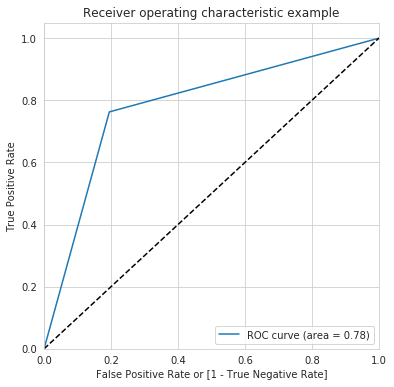

(array([0.        , 0.19489415, 1.        ]),
 array([0.        , 0.76265823, 1.        ]),
 array([2, 1, 0]))

In [0]:
#Plotting ROC AUC Curve
draw_roc(pred_test_df.Actual, pred_test_df['Opt Cutoff'])

### Applying RFE

In [0]:
# running RFE with 15 variables as output
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [0]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 28),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 40),
 ('Lead Source_Others', False, 16),
 ('Lead Source_Reference', False, 5),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Email Opened', False, 3),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 17),
 ('Last Activity_Page Visited on Website', False, 49),
 ('Last Activity_SMS Sent', True, 1),
 ('Country_Australia', False, 20),
 ('Country_Bahrain', False, 10),
 ('Country_Bangladesh', False, 27),
 ('Country_Belgium', False, 38),
 ('Country_Canada', False, 11),
 ('Country_China', False, 41),
 ('Country_Denmark', False, 48),
 ('Country_France', False, 32),
 ('Country_Germany', False, 13),
 ('Country_Ghana', False, 39),
 ('Cou

In [0]:
# Final List of columns received from RFE
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_rfe.columns.tolist()

['Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Do Not Email_Yes',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_SMS Sent',
 'Country_Italy',
 'Country_Netherlands',
 'What is your current occupation_Student',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional',
 'City_Unknown',
 'Last Notable Activity_SMS Sent',
 'Visited_Frequently']

In [0]:
#Fitting model on the variables obtained from RFE
X_train_rfe_sm = sm.add_constant(X_train_rfe)
logr5 = sm.GLM(y_train,X_train_rfe_sm, family=sm.families.Binomial())
res = logr5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5943
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2450.9
Date:                Fri, 15 Nov 2019   Deviance:                       4901.7
Time:                        11:50:54   Pearson chi2:                 6.71e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2071      0.672      0.308      0.758      -1.110       1.524
Total Time Spent on Website                              1.0655      0.041     25.780      0.000       0.984       1.146
Lead Origin_Landing Page Submission                     -1.0520      0.139     -7.565      0.000      -1.325      -0.779
Lead Origin_Lead Add Form                                3.9273      0.220     17.872      0.000       3.497       4.358
Lead Source_Olark Chat                                   1.2192      0.125      9.785      0.000       0.975       1.463
Do Not Email_Yes                                        -1.3993      0.172     -8.112      0.000      -1.737      -1.061
Last Activity_Olark Chat Conversation                   -1.4203      0.174     -8.176      0.000      -1.761      -1.080
Last Activity_SMS Sent                                   0.3160      0.146      2.167      0.030       0.030       0.602
Country_Italy                                          -23.0123   1.67e+04     -0.001      0.999   -3.27e+04    3.27e+04
Country_Netherlands                                    -23.4250   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
What is your current occupation_Student                 -0.5998      0.706     -0.849      0.396      -1.984       0.784
What is your current occupation_Unemployed              -0.7810      0.665     -1.174      0.240      -2.085       0.523
What is your current occupation_Working Professional     2.1357      0.693      3.081      0.002       0.777       3.494
City_Unknown                                            -1.1313      0.133     -8.504      0.000      -1.392      -0.871
Last Notable Activity_SMS Sent                           1.4857      0.155      9.614      0.000       1.183       1.789
Visited_Frequently                                       0.7611      0.155      4.906      0.000       0.457       1.065
========================================================================================================================
"""

In [0]:
# As we can there are some Features for which there is a high P Value
# Dropping Country_Italy
X_train_rfe_sm.drop('Country_Italy', axis = 1, inplace = True)

In [0]:
#Fitting another model after eliminating variable with p value > 0.05
logr6 = sm.GLM(y_train,X_train_rfe_sm, family=sm.families.Binomial())
res = logr6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5944
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2453.8
Date:                Fri, 15 Nov 2019   Deviance:                       4907.7
Time:                        11:50:54   Pearson chi2:                 6.71e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2088      0.672      0.311      0.756      -1.108       1.525
Total Time Spent on Website                              1.0630      0.041     25.755      0.000       0.982       1.144
Lead Origin_Landing Page Submission                     -1.0519      0.139     -7.568      0.000      -1.324      -0.779
Lead Origin_Lead Add Form                                3.9257      0.220     17.872      0.000       3.495       4.356
Lead Source_Olark Chat                                   1.2184      0.124      9.789      0.000       0.974       1.462
Do Not Email_Yes                                        -1.3965      0.172     -8.101      0.000      -1.734      -1.059
Last Activity_Olark Chat Conversation                   -1.4210      0.174     -8.182      0.000      -1.761      -1.081
Last Activity_SMS Sent                                   0.3161      0.146      2.169      0.030       0.030       0.602
Country_Netherlands                                    -22.4152   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
What is your current occupation_Student                 -0.6002      0.706     -0.850      0.395      -1.984       0.783
What is your current occupation_Unemployed              -0.7822      0.665     -1.176      0.240      -2.086       0.521
What is your current occupation_Working Professional     2.1349      0.693      3.081      0.002       0.777       3.493
City_Unknown                                            -1.1313      0.133     -8.508      0.000      -1.392      -0.871
Last Notable Activity_SMS Sent                           1.4791      0.154      9.579      0.000       1.176       1.782
Visited_Frequently                                       0.7626      0.155      4.919      0.000       0.459       1.066
========================================================================================================================
"""

In [0]:
# As we can there are some Features for which there is a high P Value
# Dropping Country_Netherlands
X_train_rfe_sm.drop('Country_Netherlands', axis = 1, inplace = True)

In [0]:
#Fitting another model after eliminating variable with p value > 0.05
logr7 = sm.GLM(y_train,X_train_rfe_sm, family=sm.families.Binomial())
res = logr7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5945
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2455.8
Date:                Fri, 15 Nov 2019   Deviance:                       4911.7
Time:                        11:50:54   Pearson chi2:                 6.71e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2107      0.672      0.314      0.754      -1.106       1.527
Total Time Spent on Website                              1.0610      0.041     25.732      0.000       0.980       1.142
Lead Origin_Landing Page Submission                     -1.0530      0.139     -7.580      0.000      -1.325      -0.781
Lead Origin_Lead Add Form                                3.9230      0.220     17.864      0.000       3.493       4.353
Lead Source_Olark Chat                                   1.2162      0.124      9.777      0.000       0.972       1.460
Do Not Email_Yes                                        -1.3944      0.172     -8.092      0.000      -1.732      -1.057
Last Activity_Olark Chat Conversation                   -1.4218      0.174     -8.189      0.000      -1.762      -1.081
Last Activity_SMS Sent                                   0.3161      0.146      2.169      0.030       0.030       0.602
What is your current occupation_Student                 -0.6002      0.706     -0.851      0.395      -1.983       0.783
What is your current occupation_Unemployed              -0.7829      0.665     -1.177      0.239      -2.086       0.520
What is your current occupation_Working Professional     2.1345      0.693      3.081      0.002       0.777       3.492
City_Unknown                                            -1.1304      0.133     -8.505      0.000      -1.391      -0.870
Last Notable Activity_SMS Sent                           1.4747      0.154      9.554      0.000       1.172       1.777
Visited_Frequently                                       0.7638      0.155      4.929      0.000       0.460       1.068
========================================================================================================================
"""

In [0]:
# As we can there are some Features for which there is a high P Value
# Dropping What is your current occupation_Student
X_train_rfe_sm.drop('What is your current occupation_Student', axis = 1, inplace = True)

In [0]:
#Fitting another model after eliminating variable with p value > 0.05
logr8 = sm.GLM(y_train,X_train_rfe_sm, family=sm.families.Binomial())
res = logr8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5946
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2456.2
Date:                Fri, 15 Nov 2019   Deviance:                       4912.4
Time:                        11:50:54   Pearson chi2:                 6.71e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3159      0.256     -1.232      0.218      -0.818       0.187
Total Time Spent on Website                              1.0621      0.041     25.768      0.000       0.981       1.143
Lead Origin_Landing Page Submission                     -1.0579      0.139     -7.620      0.000      -1.330      -0.786
Lead Origin_Lead Add Form                                3.9221      0.220     17.862      0.000       3.492       4.352
Lead Source_Olark Chat                                   1.2154      0.124      9.772      0.000       0.972       1.459
Do Not Email_Yes                                        -1.3920      0.172     -8.085      0.000      -1.729      -1.055
Last Activity_Olark Chat Conversation                   -1.4218      0.174     -8.190      0.000      -1.762      -1.082
Last Activity_SMS Sent                                   0.3178      0.146      2.182      0.029       0.032       0.603
What is your current occupation_Unemployed              -0.2525      0.227     -1.112      0.266      -0.697       0.192
What is your current occupation_Working Professional     2.6652      0.298      8.935      0.000       2.081       3.250
City_Unknown                                            -1.1335      0.133     -8.530      0.000      -1.394      -0.873
Last Notable Activity_SMS Sent                           1.4724      0.154      9.543      0.000       1.170       1.775
Visited_Frequently                                       0.7619      0.155      4.917      0.000       0.458       1.066
========================================================================================================================
"""

In [0]:
# As we can there are some Features for which there is a high P Value
# Dropping What is your current occupation_Unemployed
X_train_rfe_sm.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

In [0]:
#Fitting another model after eliminating variable with p value > 0.05
logr9 = sm.GLM(y_train,X_train_rfe_sm, family=sm.families.Binomial())
res = logr9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5947
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2456.8
Date:                Fri, 15 Nov 2019   Deviance:                       4913.6
Time:                        11:50:54   Pearson chi2:                 6.71e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5586      0.134     -4.162      0.000      -0.822      -0.296
Total Time Spent on Website                              1.0627      0.041     25.781      0.000       0.982       1.144
Lead Origin_Landing Page Submission                     -1.0595      0.139     -7.636      0.000      -1.331      -0.788
Lead Origin_Lead Add Form                                3.9249      0.219     17.886      0.000       3.495       4.355
Lead Source_Olark Chat                                   1.2172      0.124      9.788      0.000       0.973       1.461
Do Not Email_Yes                                        -1.3908      0.172     -8.077      0.000      -1.728      -1.053
Last Activity_Olark Chat Conversation                   -1.4204      0.174     -8.179      0.000      -1.761      -1.080
Last Activity_SMS Sent                                   0.3128      0.146      2.149      0.032       0.028       0.598
What is your current occupation_Working Professional     2.9104      0.201     14.455      0.000       2.516       3.305
City_Unknown                                            -1.1371      0.133     -8.562      0.000      -1.397      -0.877
Last Notable Activity_SMS Sent                           1.4727      0.154      9.547      0.000       1.170       1.775
Visited_Frequently                                       0.7609      0.155      4.909      0.000       0.457       1.065
========================================================================================================================
"""

For all the features P Values is ~0 so now checking the VIF Score

In [0]:
# Finding the VIF Score
vif = pd.DataFrame()
vif['features'] = X_train_rfe_sm.iloc[:,1:].columns
vif['vif'] = [variance_inflation_factor(X_train_rfe_sm.iloc[:,1:].values, i) for i in range(len(X_train_rfe_sm.iloc[:,1:].columns))]
vif.sort_values(by = 'vif', ascending = False , inplace = True)
vif

,features,vif
6,Last Activity_SMS Sent,5.478260
9,Last Notable Activity_SMS Sent,4.967135
8,City_Unknown,2.171768
3,Lead Source_Olark Chat,2.084953
1,Lead Origin_Landing Page Submission,1.475720
5,Last Activity_Olark Chat Conversation,1.459811
2,Lead Origin_Lead Add Form,1.317696
0,Total Time Spent on Website,1.302013
7,What is your current occupation_Working Profes...,1.162542
4,Do Not Email_Yes,1.105170


In [0]:
# As we can there is a Features for which there is a VIF score > 5
# Dropping Last Activity_SMS Sent
X_train_rfe_sm.drop('Last Activity_SMS Sent', axis = 1, inplace = True)

In [0]:
#Fitting another model after eliminating variable with vif > 5
logr10 = sm.GLM(y_train,X_train_rfe_sm, family=sm.families.Binomial())
res = logr10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5948
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2459.1
Date:                Fri, 15 Nov 2019   Deviance:                       4918.2
Time:                        11:50:54   Pearson chi2:                 6.67e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5385      0.134     -4.021      0.000      -0.801      -0.276
Total Time Spent on Website                              1.0634      0.041     25.814      0.000       0.983       1.144
Lead Origin_Landing Page Submission                     -1.0489      0.139     -7.563      0.000      -1.321      -0.777
Lead Origin_Lead Add Form                                3.9615      0.219     18.050      0.000       3.531       4.392
Lead Source_Olark Chat                                   1.2072      0.124      9.729      0.000       0.964       1.450
Do Not Email_Yes                                        -1.3888      0.172     -8.073      0.000      -1.726      -1.052
Last Activity_Olark Chat Conversation                   -1.4467      0.173     -8.357      0.000      -1.786      -1.107
What is your current occupation_Working Professional     2.9005      0.201     14.411      0.000       2.506       3.295
City_Unknown                                            -1.1216      0.133     -8.456      0.000      -1.382      -0.862
Last Notable Activity_SMS Sent                           1.7545      0.082     21.294      0.000       1.593       1.916
Visited_Frequently                                       0.7557      0.155      4.881      0.000       0.452       1.059
========================================================================================================================
"""

In [0]:
# Finding the VIF Score
vif = pd.DataFrame()
vif['features'] = X_train_rfe_sm.iloc[:,1:].columns
vif['vif'] = [variance_inflation_factor(X_train_rfe_sm.iloc[:,1:].values, i) for i in range(len(X_train_rfe_sm.iloc[:,1:].columns))]
vif.sort_values(by = 'vif', ascending = False , inplace = True)
vif

,features,vif
7,City_Unknown,2.107725
3,Lead Source_Olark Chat,2.084841
5,Last Activity_Olark Chat Conversation,1.446277
8,Last Notable Activity_SMS Sent,1.416786
1,Lead Origin_Landing Page Submission,1.397693
2,Lead Origin_Lead Add Form,1.304120
0,Total Time Spent on Website,1.301281
6,What is your current occupation_Working Profes...,1.162420
4,Do Not Email_Yes,1.105158
9,Visited_Frequently,1.066575


As we can see above all the Features has nearly ~0 P Value and for all the Features VIF score is less than 5, so now we can proceed with predicting

### Predicting with the model built

In [0]:
#Making dataframe for Actual value
pred_rfe_df = pd.DataFrame({'Actual':y_train})
pred_rfe_df.head()

,Actual
6136,0
7902,1
7650,0
3475,0
7745,0


In [0]:
#Predicting probability for X_train and rounding it of on 0.5 for now
y_train_pred_prob = res.predict(X_train_rfe_sm)
pred_rfe_df['Probability'] = y_train_pred_prob
pred_rfe_df['Predicted'] = pred_rfe_df['Probability'].map(lambda x : 1 if x > 0.5 else 0)
pred_rfe_df.head()

,Actual,Probability,Predicted
6136,0,0.620162,1
7902,1,0.810148,1
7650,0,0.023363,0
3475,0,0.704990,1
7745,0,0.056170,0


In [0]:
#Checking accuracy score
accuracy_score(pred_rfe_df.Actual, pred_rfe_df.Predicted)

0.8122168149018292

In [0]:
confusion_matrix(pred_rfe_df.Actual, pred_rfe_df.Predicted)

array([[3273,  428],
       [ 691, 1567]])

In [0]:
#Making dataframe for different cutoff values
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    pred_rfe_df[i]=  pred_rfe_df.Probability.map(lambda x: 1 if x > i else 0)
pred_rfe_df.head()

,Actual,Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
6136,0,0.620162,1,1,1,1,1,1,1,1,0,0,0
7902,1,0.810148,1,1,1,1,1,1,1,1,1,1,0
7650,0,0.023363,0,1,0,0,0,0,0,0,0,0,0
3475,0,0.704990,1,1,1,1,1,1,1,1,1,0,0
7745,0,0.056170,0,1,0,0,0,0,0,0,0,0,0


In [0]:
# let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['cutoff','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
   cm1 = confusion_matrix(pred_rfe_df.Actual, pred_rfe_df[i] )
   total1=sum(sum(cm1))
   accuracy = (cm1[0,0]+cm1[1,1])/total1
   
   speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
   sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
   cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     cutoff  accuracy     sensi     speci
0.0     0.0  0.378923  1.000000  0.000000
0.1     0.1  0.607149  0.965013  0.388814
0.2     0.2  0.743246  0.916298  0.637665
0.3     0.3  0.803658  0.852081  0.774115
0.4     0.4  0.811210  0.781665  0.829235
0.5     0.5  0.812217  0.693977  0.884356
0.6     0.6  0.798456  0.579717  0.931910
0.7     0.7  0.785702  0.511072  0.953256
0.8     0.8  0.757006  0.405669  0.971359
0.9     0.9  0.722101  0.288308  0.986760


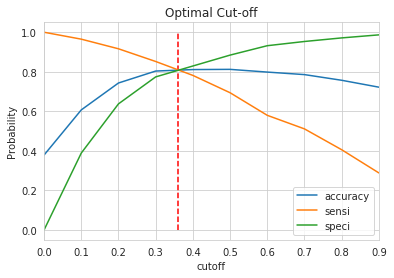

In [0]:
#Finding optimal cut-off
cutoff_df.plot.line(x='cutoff', y=['accuracy','sensi','speci'])
plt.vlines(0.36, ymax=1, ymin=0, colors='r', linestyles='--')
plt.ylabel('Probability', fontsize = 10)
plt.title('Optimal Cut-off')
plt.show()

In [0]:
## So the optimal cut off is 0.36
pred_rfe_df['Opt Cutoff'] = pred_rfe_df['Probability'].map(lambda x : 1 if x > 0.36 else 0)
pred_rfe_df.head()

,Actual,Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Opt Cutoff
6136,0,0.620162,1,1,1,1,1,1,1,1,0,0,0,1
7902,1,0.810148,1,1,1,1,1,1,1,1,1,1,0,1
7650,0,0.023363,0,1,0,0,0,0,0,0,0,0,0,0
3475,0,0.704990,1,1,1,1,1,1,1,1,1,0,0,1
7745,0,0.056170,0,1,0,0,0,0,0,0,0,0,0,0


In [0]:
confusion_matrix(pred_rfe_df.Actual, pred_rfe_df['Opt Cutoff'])

array([[2980,  721],
       [ 424, 1834]])

In [0]:
confusion_matrix(pred_rfe_df.Actual, pred_rfe_df.Predicted)

array([[3273,  428],
       [ 691, 1567]])

In [0]:
#Checking Accuracy score
accuracy_score(pred_rfe_df.Actual, pred_rfe_df['Opt Cutoff'])

0.8078536667226045

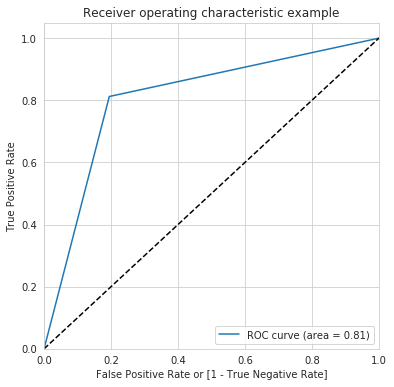

(array([0.        , 0.19481221, 1.        ]),
 array([0.        , 0.81222321, 1.        ]),
 array([2, 1, 0]))

In [0]:
#Making ROC curve and checking AUC score
draw_roc(pred_rfe_df.Actual, pred_rfe_df['Opt Cutoff'])

In [0]:
# Convert X Test to have only the Final Features
X_test_rfe_df = X_test[X_train_rfe_sm.iloc[:,1:].columns.tolist()]
X_test_rfe_df.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Do Not Email_Yes,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,City_Unknown,Last Notable Activity_SMS Sent,Visited_Frequently
5929,-0.793283,1,0,0,0,0,0,0,0,0
225,-0.866978,0,0,1,0,1,0,1,0,0
2764,1.881850,1,0,0,0,0,0,0,0,0
5048,-0.826446,0,0,0,0,0,0,1,1,0
4636,1.854214,1,0,0,0,0,0,0,1,0


In [0]:
# Test set Prediction
y_test_pred_prob = res.predict(sm.add_constant(X_test_rfe_df.values))
pred_test_rfe_df = pd.DataFrame()
pred_test_rfe_df['Actual'] = y_test
pred_test_rfe_df['Probability'] = y_test_pred_prob
pred_test_rfe_df['Opt Cutoff'] = pred_test_rfe_df['Probability'].map(lambda x : 1 if x > 0.36 else 0)
pred_test_rfe_df.head()

,Actual,Probability,Opt Cutoff
5929,0,0.080845,0
225,0,0.056170,0
2764,0,0.602005,1
5048,0,0.313357,0
4636,1,0.894630,1


In [0]:
# Confusion Matrix
confusion_matrix(pred_test_rfe_df.Actual, pred_test_rfe_df['Opt Cutoff'])

array([[1307,  299],
       [ 211,  737]])

In [0]:
#Checking Accuracy score
accuracy_score(pred_test_rfe_df.Actual, pred_test_rfe_df['Opt Cutoff'])

0.8003132341425215

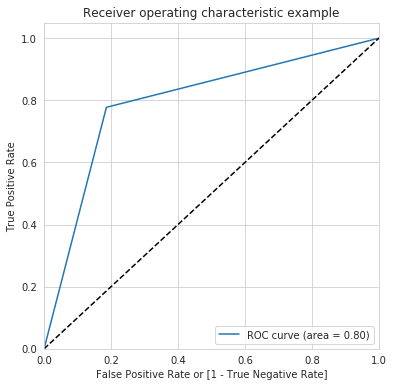

(array([0.        , 0.18617684, 1.        ]),
 array([0.        , 0.77742616, 1.        ]),
 array([2, 1, 0]))

In [0]:
# To plot ROC AUC Curve
draw_roc(pred_test_rfe_df.Actual, pred_test_rfe_df['Opt Cutoff'])

### Applying SVM

In [0]:
#Fitting linear model with random defaul hyper parameters
linearmodel = SVC(kernel='linear', random_state = 56)
linearmodel.fit(X_train_rfe_sm.iloc[:,1:],y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=56,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_train_SVM = linearmodel.predict(X_train_rfe_sm.iloc[:,1:])

In [0]:
#Checking accuracy score
accuracy_score(y_train, y_train_SVM)

0.8100352408122168

#### Running GridSearchCV with KFold = 5

In [0]:
#Finding the best hyperparameter
# Here the main objective is to find the best possible Hyperparameter

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specifying range of hyperparameters
# Setting the parameters by cross-validation
hyper_params = [ {
                     'C': [1, 10, 100, 1000]
                 }]


# specifying model
model = SVC(kernel='linear')

# setting up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1,
                        return_train_score=True)      

# fitting the model
model_cv.fit(X_train_rfe_sm.iloc[:,1:], y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  6.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1, param_grid=[{'C': [1, 10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [0]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.629324,0.014310,0.064632,0.006443,1,{'C': 1},0.791107,0.819631,0.810403,0.805369,0.807725,0.806847,0.009239,1,0.815188,0.800294,0.810992,0.811831,0.813968,0.810455,0.005295
1,1.276092,0.074291,0.059390,0.001223,10,{'C': 10},0.791946,0.821309,0.809564,0.803691,0.807725,0.806847,0.009480,1,0.814558,0.801552,0.811831,0.811412,0.813339,0.810539,0.004630
2,6.186213,0.788170,0.056826,0.002763,100,{'C': 100},0.791946,0.821309,0.809564,0.803691,0.806885,0.806679,0.009470,3,0.814768,0.801762,0.812041,0.811412,0.813339,0.810664,0.004598
3,130.919439,75.868371,0.051585,0.007406,1000,{'C': 1000},0.791946,0.820470,0.809564,0.803691,0.807725,0.806679,0.009227,3,0.814768,0.801552,0.811831,0.811412,0.813549,0.810622,0.004693


In [0]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8068467863735526 corresponding to hyperparameters {'C': 1}


In [0]:
#Building the final model
svmfinal = SVC(kernel='linear', C = 1, probability=True)

In [0]:
svmfinal.fit(X_train_rfe_sm.iloc[:,1:], y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
#Predicting for X_train
y_train_prob_svm = svmfinal.predict_proba(X_train_rfe_sm.iloc[:,1:])

In [0]:
# Train Prediction and taking the cut off value as 0.5
predsvmdf = pd.DataFrame({'Actual':y_train})
predsvmdf.head()

predsvmdf['Probability'] = y_train_prob_svm[:,1:].reshape(-1)
predsvmdf['Predicted'] = predsvmdf['Probability'].map(lambda x : 1 if x > 0.5 else 0)
predsvmdf.head()


,Actual,Probability,Predicted
6136,0,0.630097,1
7902,1,0.819241,1
7650,0,0.062005,0
3475,0,0.693310,1
7745,0,0.113342,0


In [0]:
#Checking accuracy, sensitivity and specificity for different cut offs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    predsvmdf[i]=  predsvmdf.Probability.map(lambda x: 1 if x > i else 0)

# let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['cutoff','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
   cm1 = confusion_matrix(predsvmdf.Actual, predsvmdf[i] )
   total1=sum(sum(cm1))
   accuracy = (cm1[0,0]+cm1[1,1])/total1
   
   speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
   sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
   cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     cutoff  accuracy     sensi     speci
0.0     0.0  0.378923  1.000000  0.000000
0.1     0.1  0.544387  0.969885  0.284788
0.2     0.2  0.789226  0.883968  0.731424
0.3     0.3  0.803155  0.853410  0.772494
0.4     0.4  0.807182  0.772365  0.828425
0.5     0.5  0.813056  0.692205  0.886787
0.6     0.6  0.797785  0.579717  0.930830
0.7     0.7  0.786877  0.515058  0.952715
0.8     0.8  0.755160  0.400797  0.971359
0.9     0.9  0.724618  0.294951  0.986760


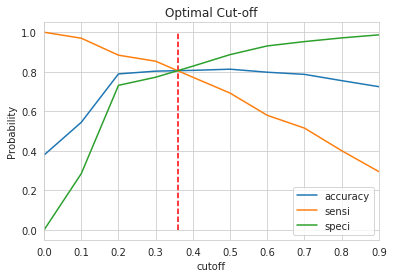

In [0]:
# PLot Accuracy, Sensitivity, Specificity and obtain Optimal Cut-off
cutoff_df.plot.line(x='cutoff', y=['accuracy','sensi','speci'])
plt.vlines(0.36, ymax=1, ymin=0, colors='r', linestyles='--')
plt.ylabel('Probability', fontsize = 10)
plt.title('Optimal Cut-off')
plt.show()

In [0]:
#Rounding off on optimal cut off
predsvmdf['Opt Cutoff'] = predsvmdf['Probability'].map(lambda x : 1 if x > 0.36 else 0)
predsvmdf.head()

,Actual,Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Opt Cutoff
6136,0,0.630097,1,1,1,1,1,1,1,1,0,0,0,1
7902,1,0.819241,1,1,1,1,1,1,1,1,1,1,0,1
7650,0,0.062005,0,1,0,0,0,0,0,0,0,0,0,0
3475,0,0.693310,1,1,1,1,1,1,1,1,0,0,0,1
7745,0,0.113342,0,1,1,0,0,0,0,0,0,0,0,0


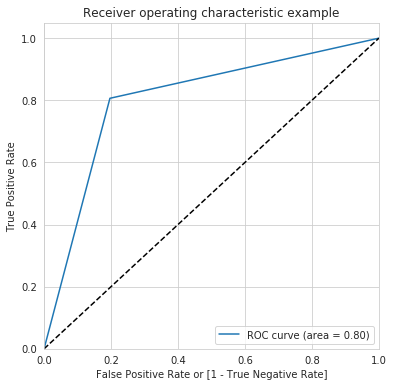

(array([0.        , 0.19670359, 1.        ]),
 array([0.       , 0.8064659, 1.       ]),
 array([2, 1, 0]))

In [0]:
#Making ROC cure and checking AUC score
draw_roc(predsvmdf.Actual, predsvmdf['Opt Cutoff'])

In [0]:
y_test_prob_svm = svmfinal.predict_proba(X_test_rfe_df)

In [0]:
# Test Prediction
predsvm_testdf = pd.DataFrame({'Actual':y_test})
predsvm_testdf.head()

predsvm_testdf['Probability'] = y_test_prob_svm[:,1:].reshape(-1)
predsvm_testdf['Opt Cutoff'] = predsvm_testdf['Probability'].map(lambda x : 1 if x > 0.36 else 0)
predsvm_testdf.head()

,Actual,Probability,Opt Cutoff
5929,0,0.079015,0
225,0,0.113342,0
2764,0,0.610624,1
5048,0,0.316835,0
4636,1,0.903584,1


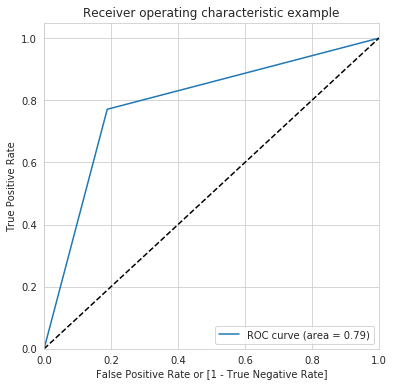

(array([0.       , 0.1886675, 1.       ]),
 array([0.        , 0.77109705, 1.        ]),
 array([2, 1, 0]))

In [0]:
#Checking AUC score and ROC curve for test set prediction
draw_roc(predsvm_testdf.Actual, predsvm_testdf['Opt Cutoff'])

### Checking Different values

In [0]:
analysis_df = pd.DataFrame( index= ['Sensitivity', 'Specificity', 'False_Positive_Rate', 'Positive_Predictive_Value', 'Negative_Predictive_Value', 'Precision', 'Recall' ])
def values(cm, name):

    TP = cm[1,1] # true positive 
    TN = cm[0,0] # true negatives
    FP = cm[0,1] # false positives
    FN = cm[1,0] # false negatives
    print('Sensitivity: ',round(TP / float(TP+FN),2))
    print('Specificity: ',round(TN / float(TN+FP),2))
    print('False Positive Rate: ', round(FP/ float(TN+FP),2))
    print('Positive Predictive Value: ',round(TP / float(TP+FP),2))
    print('Negative Predictive Value: ',round(TN / float(TN+FN),2))
    print('Precision: ', round(TP/float(TP+FP),2))
    print('Recall: ', round(TP/float(TP+FN),2))

    analysis_df[name] = [round(TP / float(TP+FN),2), round(TN / float(TN+FP),2), round(FP/ float(TN+FP),2), round(TP / float(TP+FP),2), round(TN / float(TN+FN),2), round(TP/float(TP+FP),2), round(TP/float(TP+FN),2) ]

In [0]:
# Model Perfromance Analysis Using RFE, PCA by applying Logistic Regression
# Here a decision will be taken will consider which modelling taking for final result
print("Different Scores for Logistic Regression Model and Dimension Reduction using RFE")
print("--------------Training--------------")
values(confusion_matrix(pred_rfe_df.Actual, pred_rfe_df['Opt Cutoff']), name = 'LR_TRAIN_RFE')

print("--------------Testing--------------")
values(confusion_matrix(pred_test_rfe_df.Actual, pred_test_rfe_df['Opt Cutoff']),name = 'LR_TEST_RFE')
print("************************************")

print("Different Scores for Logistic Regression Model and Dimension Reduction using PCA")
print("--------------Training--------------", sep = '\n\n')
values(confusion_matrix(preddf.Actual, preddf['Opt Cutoff']),name = 'LR_TRAIN_PCA')
print("--------------Testing--------------")
values(confusion_matrix(pred_test_df.Actual, pred_test_df['Opt Cutoff']),name = 'LR_TEST_PCA')

print("Different Scores for SVM and Dimension Reduction using RFE")
print("--------------Training--------------", sep = '\n\n')
values(confusion_matrix(predsvmdf.Actual, predsvmdf['Opt Cutoff']),name = 'SVM_TRAIN_RFE')
print("--------------Testing--------------")
values(confusion_matrix(predsvm_testdf.Actual, predsvm_testdf['Opt Cutoff']),name = 'SVM_TEST_RFE')

Different Scores for Logistic Regression Model and Dimension Reduction using RFE
--------------Training--------------
Sensitivity:  0.81
Specificity:  0.81
False Positive Rate:  0.19
Positive Predictive Value:  0.72
Negative Predictive Value:  0.88
Precision:  0.72
Recall:  0.81
--------------Testing--------------
Sensitivity:  0.78
Specificity:  0.81
False Positive Rate:  0.19
Positive Predictive Value:  0.71
Negative Predictive Value:  0.86
Precision:  0.71
Recall:  0.78
************************************
Different Scores for Logistic Regression Model and Dimension Reduction using PCA
--------------Training--------------
Sensitivity:  0.79
Specificity:  0.8
False Positive Rate:  0.2
Positive Predictive Value:  0.7
Negative Predictive Value:  0.86
Precision:  0.7
Recall:  0.79
--------------Testing--------------
Sensitivity:  0.76
Specificity:  0.81
False Positive Rate:  0.19
Positive Predictive Value:  0.7
Negative Predictive Value:  0.85
Precision:  0.7
Recall:  0.76
Different Sco

In [0]:
analysis_df

,LR_TRAIN_RFE,LR_TEST_RFE,LR_TRAIN_PCA,LR_TEST_PCA,SVM_TRAIN_RFE,SVM_TEST_RFE
Sensitivity,0.81,0.78,0.79,0.76,0.81,0.77
Specificity,0.81,0.81,0.80,0.81,0.80,0.81
False_Positive_Rate,0.19,0.19,0.20,0.19,0.20,0.19
Positive_Predictive_Value,0.72,0.71,0.70,0.70,0.71,0.71
Negative_Predictive_Value,0.88,0.86,0.86,0.85,0.87,0.86
Precision,0.72,0.71,0.70,0.70,0.71,0.71
Recall,0.81,0.78,0.79,0.76,0.81,0.77


**Logistic Regression after PCA:** The model gives good specificity but comparitively less Sensitivity with acceptable False Positive Rate.

**Logistic Regression after RFE**: The model shows good Sensitivity and Specificity with fine False Positive Rate.

**SVM after RFE**: The model gives the highest Sensitivity and Specificity in comparison to others as well as the lowest False Positive Rate.

### From the conclusion made above, We'll build the final model using SVM.

In [0]:
#Resetting the index of the dataframe with 'Lead Number' and 'Prospective ID' to merge with final dataframe
lead_df.reset_index(inplace=True)

In [0]:
finaldf = (pd.concat([predsvmdf[['Actual','Probability','Opt Cutoff']], predsvm_testdf[['Actual','Probability','Opt Cutoff']]])).reset_index()

In [0]:
finaldf.sort_values(by='index')

,index,Actual,Probability,Opt Cutoff
524,0,0,0.164408,0
7577,1,0,0.216309,0
5302,2,1,0.630598,1
3395,3,0,0.127142,0
8468,4,1,0.578864,1
...,...,...,...,...
3241,8508,1,0.553400,1
228,8509,0,0.440625,1
7802,8510,0,0.134081,0
7499,8511,1,0.570341,1


In [0]:
#Merging final dataframe with lead dataframe
final_outcome = pd.merge(lead_df, finaldf, how='inner', on='index')

In [0]:
final_outcome.drop(columns='index', inplace=True)

In [0]:
final_outcome

,Prospect ID,Lead Number,Actual,Probability,Opt Cutoff
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.164408,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0.216309,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,0.630598,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0.127142,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,0.578864,1
...,...,...,...,...,...
8508,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,1,0.553400,1
8509,82a7005b-7196-4d56-95ce-a79f937a158d,579546,0,0.440625,1
8510,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,0,0.134081,0
8511,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,1,0.570341,1


In [0]:
final_outcome['Score'] = final_outcome['Probability'].map(lambda x: round(x*100,2))
final_outcome.head()

,Prospect ID,Lead Number,Actual,Probability,Opt Cutoff,Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.164408,0,16.44
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0.216309,0,21.63
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,0.630598,1,63.06
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0.127142,0,12.71
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,0.578864,1,57.89


In [0]:
#Dataframe for the Leads with high Score or Leads predicted as Converted
hotleads = final_outcome[final_outcome['Opt Cutoff'] == 1]
hotleads.head()

,Prospect ID,Lead Number,Actual,Probability,Opt Cutoff,Score
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,0.630598,1,63.06
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,0.578864,1,57.89
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,1,0.677041,1,67.70
10,9bc8ce93-6144-49e0-9f9d-080fc980f83c,660570,1,0.681322,1,68.13
16,82cb5fb0-2d97-4a39-a630-ab5fe2e7f18c,660522,1,0.697640,1,69.76


In [0]:
#Dataframe for the Leads with low Score or Leads predicted as Not Converted
hotleads = final_outcome[final_outcome['Opt Cutoff'] == 0]
hotleads.head()

,Prospect ID,Lead Number,Actual,Probability,Opt Cutoff,Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.164408,0,16.44
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0.216309,0,21.63
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0.127142,0,12.71
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,0,0.113342,0,11.33
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,0,0.113342,0,11.33


In [0]:
#Checking Coefficients of the Features obtained from the model
print((pd.DataFrame({'Features':X_test_rfe_df.columns.tolist(),'Coefficients':svmfinal.coef_.tolist()[0]})).sort_values(by='Coefficients', ascending=False))

                                            Features  Coefficients
2                          Lead Origin_Lead Add Form      2.686179
6  What is your current occupation_Working Profes...      1.948201
8                     Last Notable Activity_SMS Sent      1.239819
0                        Total Time Spent on Website      0.738040
3                             Lead Source_Olark Chat      0.686059
9                                 Visited_Frequently      0.417220
5              Last Activity_Olark Chat Conversation     -0.293570
1                Lead Origin_Landing Page Submission     -0.619447
7                                       City_Unknown     -0.686103
4                                   Do Not Email_Yes     -1.054078


### Checking conversion rate from the predicted outcome

As we had removed several rows at the data cleansing process, we'll import the original dataset again to compute the conversion rate.

In [0]:
dfcheck = pd.read_csv('/content/drive/My Drive/Lead Score - Case Study/Leads.csv')
dfcheck.shape

(9240, 37)

In [0]:
#Conversion rate from the predicted outcome
print('Conversion Rate: ', round(100*(dfcheck.Converted.sum()/len(dfcheck)),2))

Conversion Rate:  38.54
